In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
for _,dirnames,filenames in os.walk('C:\\Users\\ajaym\\Desktop\\HeartDiseaseClassification\\Data'):
    for filename in filenames:
        print(filename)

EDA.ipynb
Model_training.ipynb
raw_data.csv
Untitled.ipynb
EDA-checkpoint.ipynb
Model_training-checkpoint.ipynb
Untitled-checkpoint.ipynb


In [3]:
## loading the data

mydata = pd.read_csv('raw_data.csv')

mydata.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## copying the rawdata

copy_data = mydata.copy()


In [5]:
## exploring the data

copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
copy_data.shape

(303, 14)

In [7]:
copy_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
copy_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
copy_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
avg_age = copy_data.age.mean()

max_age = copy_data.age.max()

min_age = copy_data.age.min()

In [11]:
print("The average age of a person is {}".format(avg_age))
print("The max age of a person is {}".format(max_age))
print("The min age of a person is {}".format(min_age))

The average age of a person is 54.366336633663366
The max age of a person is 77
The min age of a person is 29


In [12]:
copy_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']] = copy_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']].astype('O')

In [13]:
copy_data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [14]:
copy_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [33]:
## exploring the columns in the dataset

numeric_cols = [feature for feature in copy_data.columns if copy_data[feature].dtypes != 'O']

categoric_cols = [feature for feature in copy_data.columns if copy_data[feature].dtypes == 'O']


In [34]:
print('The number of numeric columns in the dataset is {} and they are : {}'.format(len(numeric_cols), numeric_cols))

print("The number of categoric columns in the dataset is {} and they are : {}".format(len(categoric_cols), categoric_cols))

The number of numeric columns in the dataset is 5 and they are : ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The number of categoric columns in the dataset is 9 and they are : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [35]:
copy_data.describe(include = 'O')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


In [36]:
copy_data.fbs.describe()

count     303
unique      2
top         0
freq      258
Name: fbs, dtype: int64

In [37]:
copy_data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### UNIVARIATE ANALYSIS ####

In [38]:
numeric_columns = copy_data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
numeric_columns.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


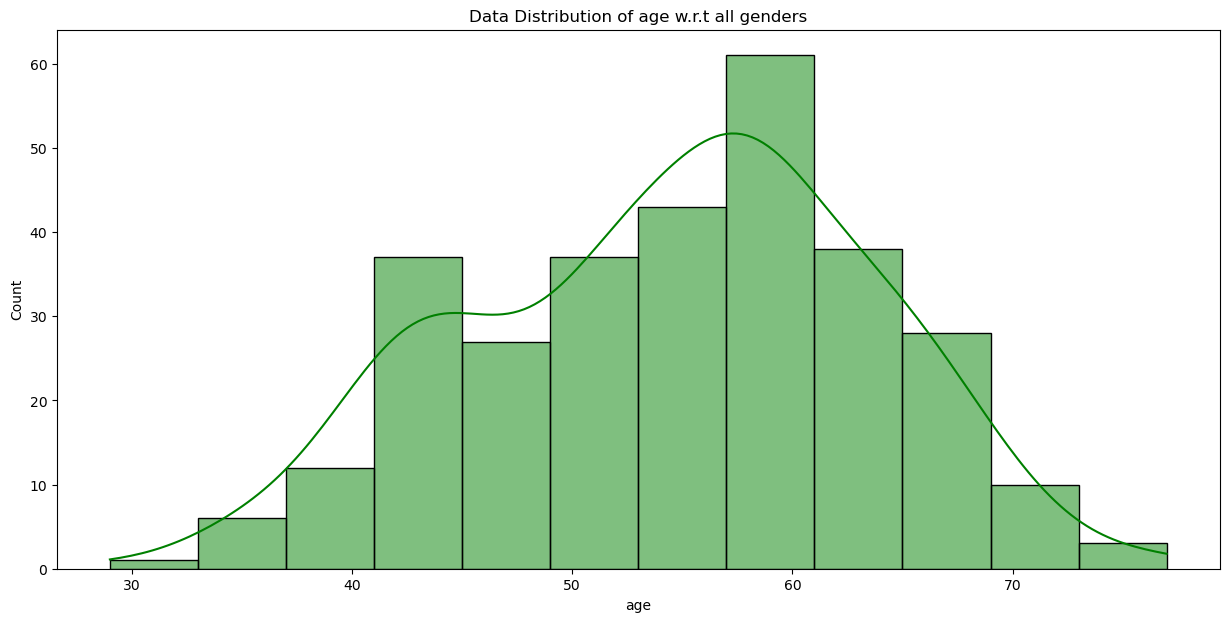

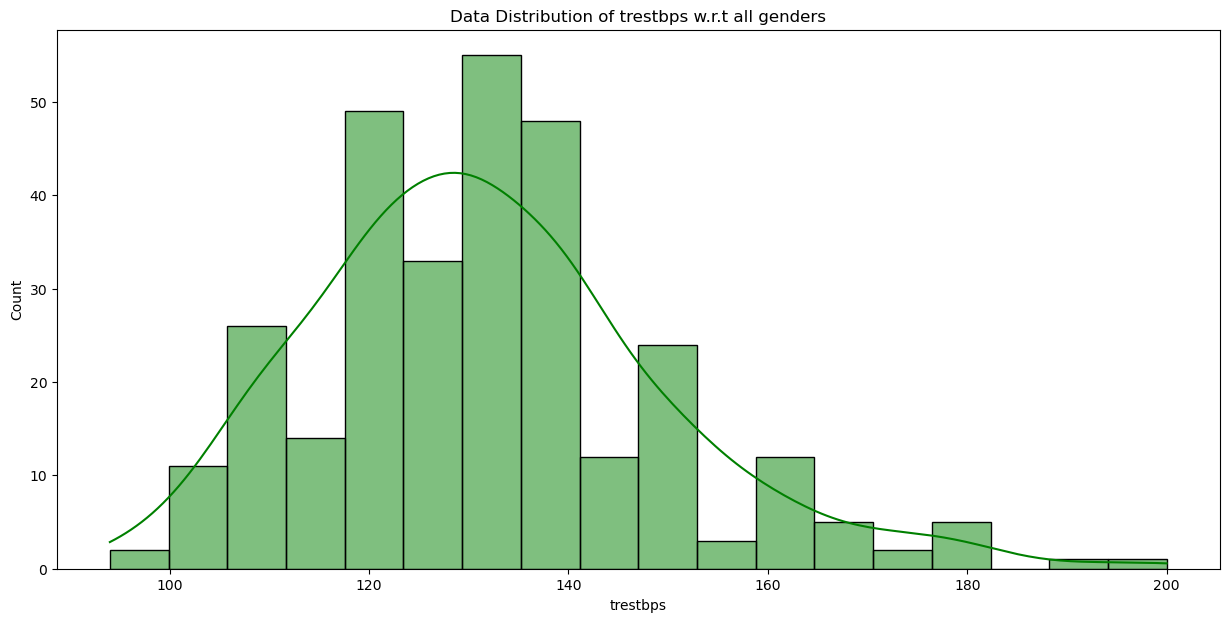

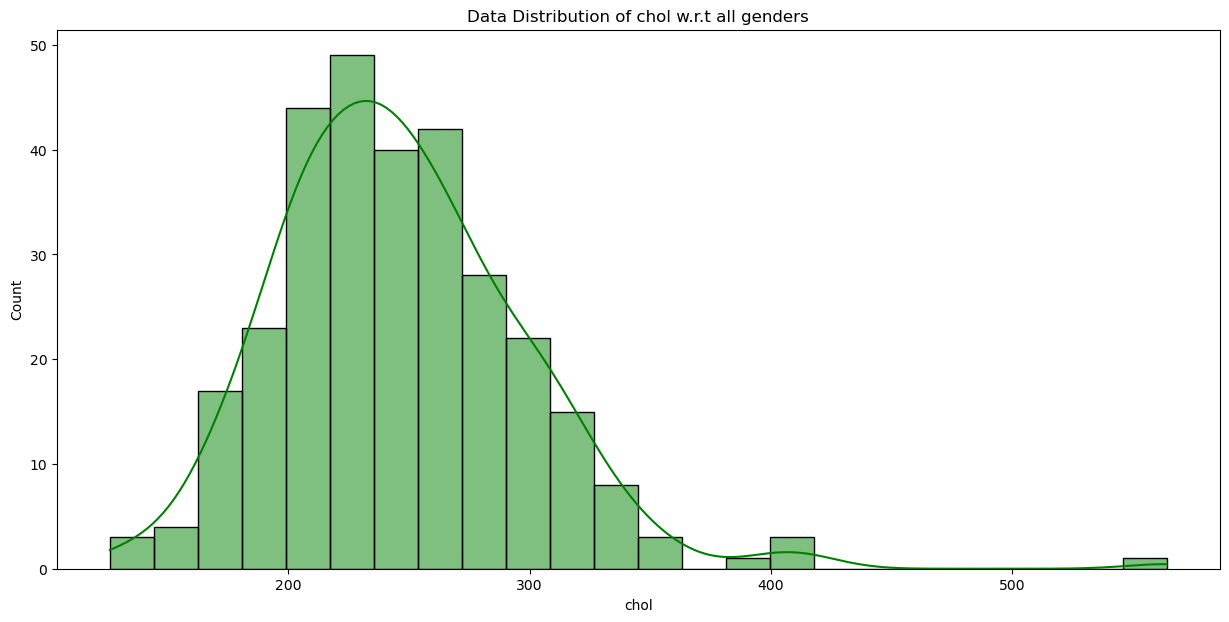

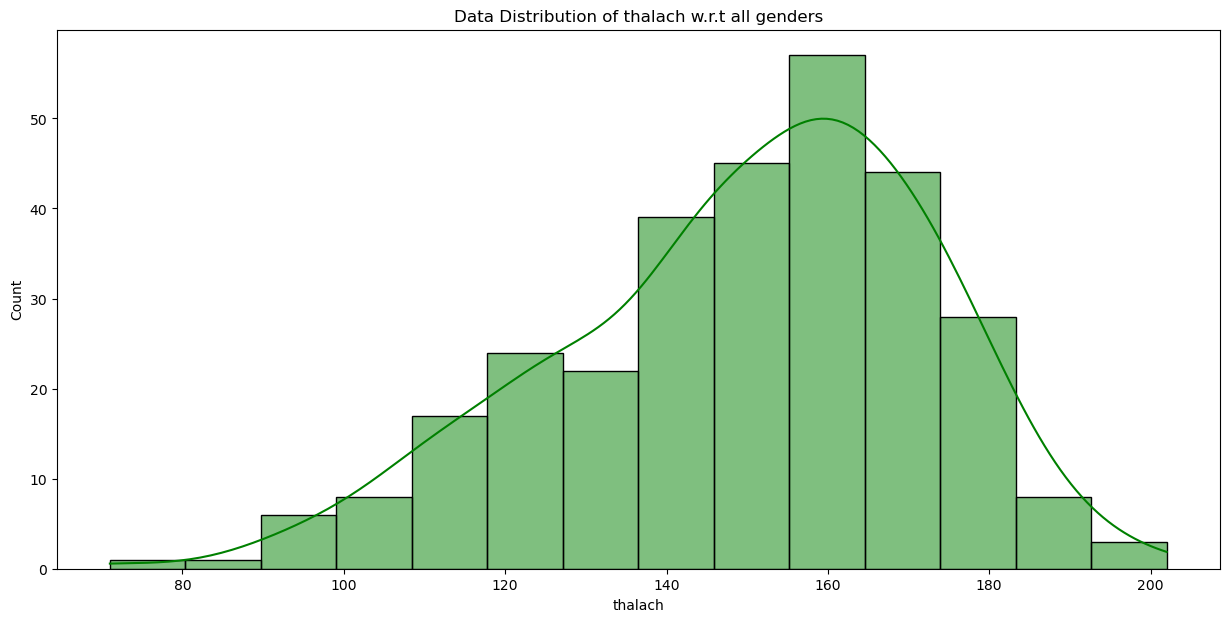

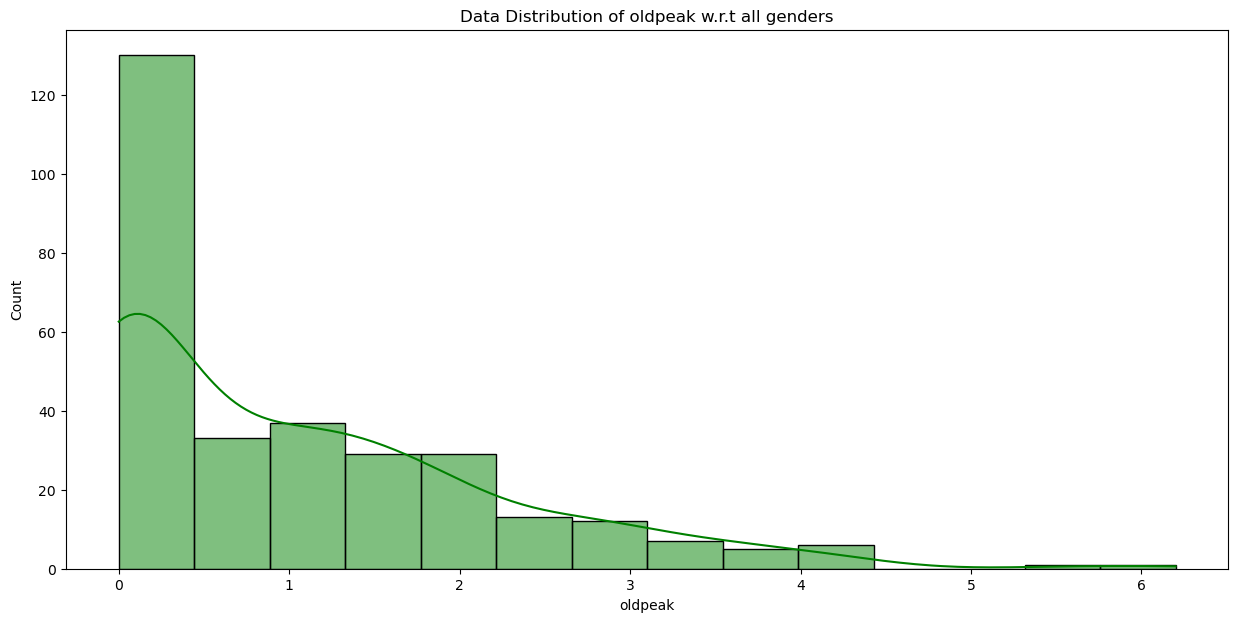

In [39]:
for i, col in enumerate(numeric_columns.columns):
    plt.subplots(figsize =(15, 7))
    plt.title(f"Data Distribution of {col} w.r.t all genders")
    sns.histplot(data = numeric_columns, x = col, color = 'green', kde = True)
    plt.show()

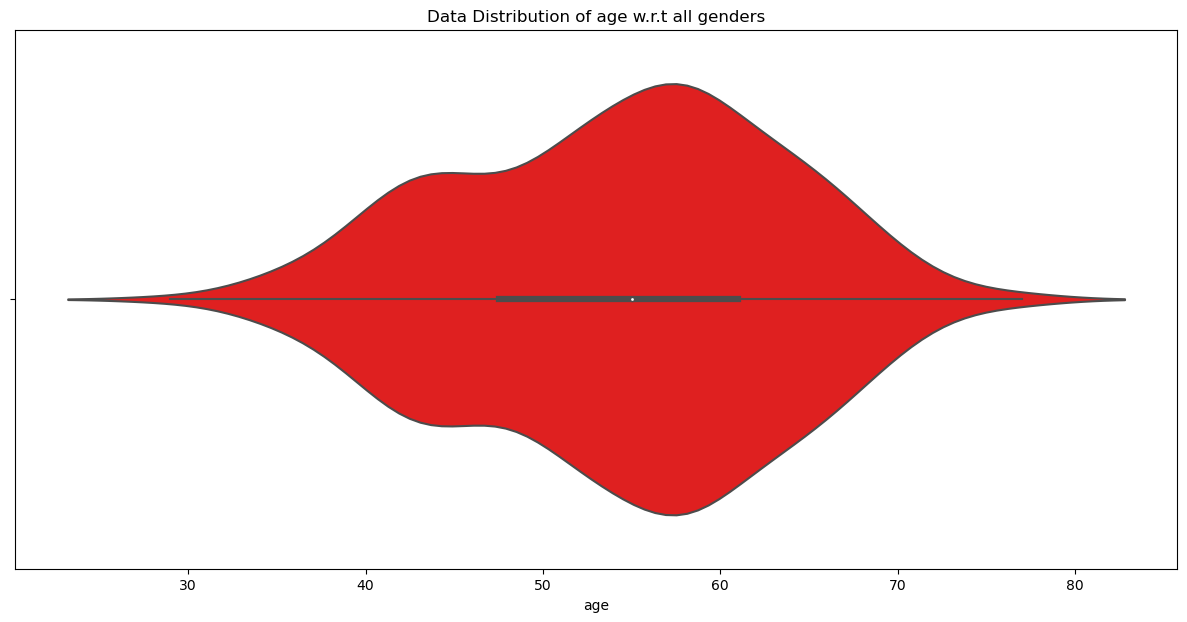

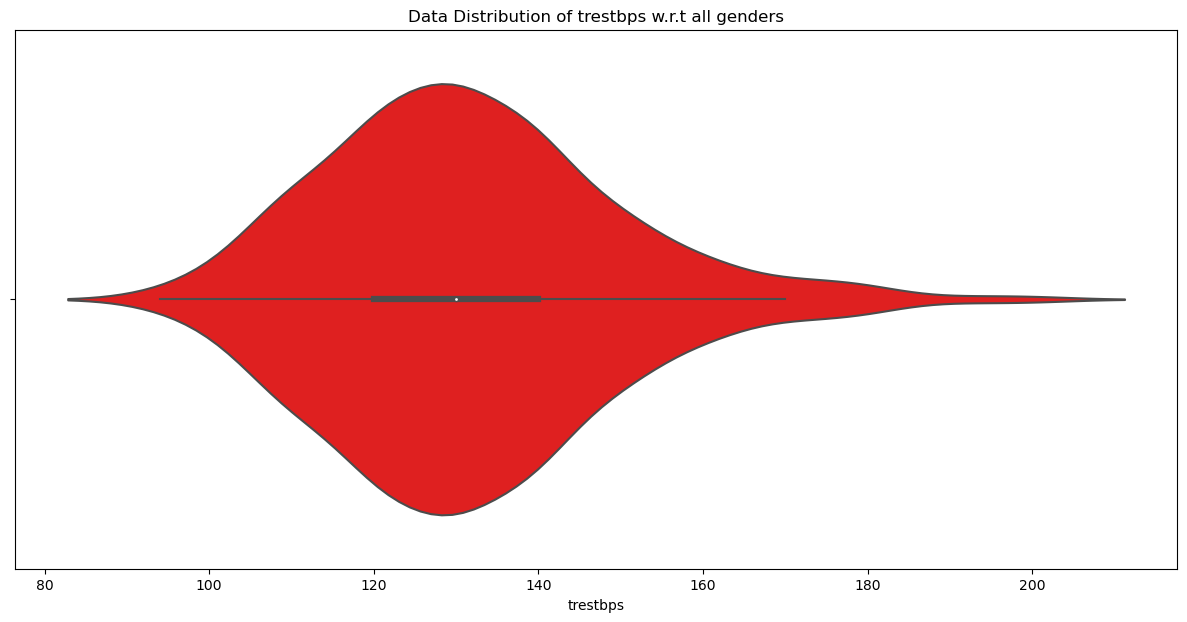

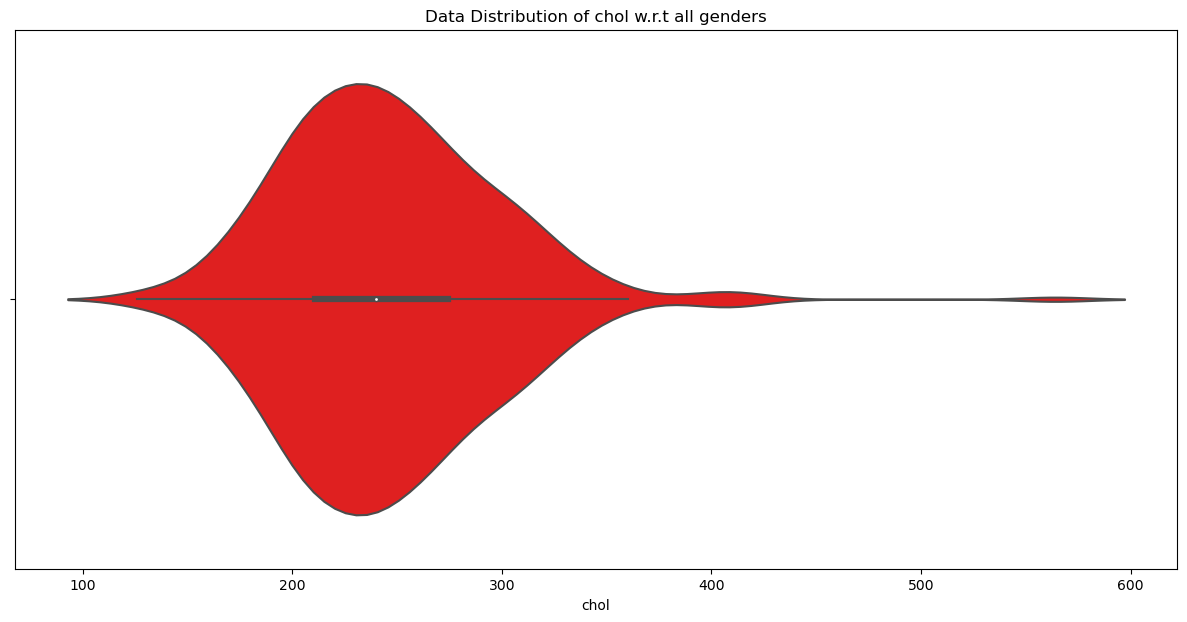

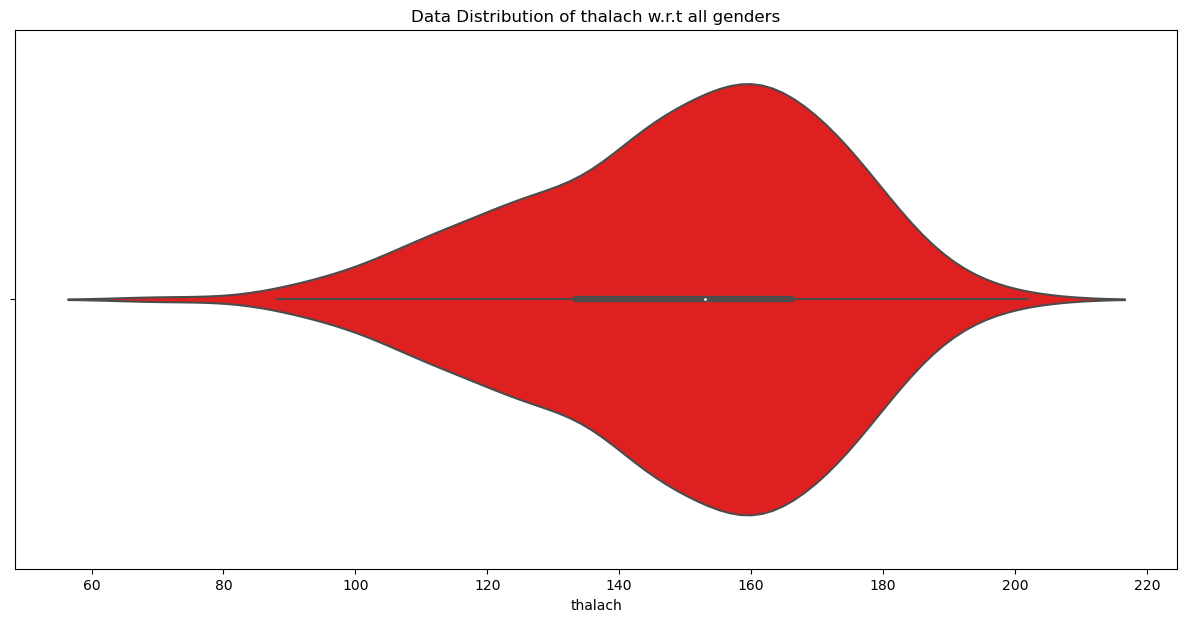

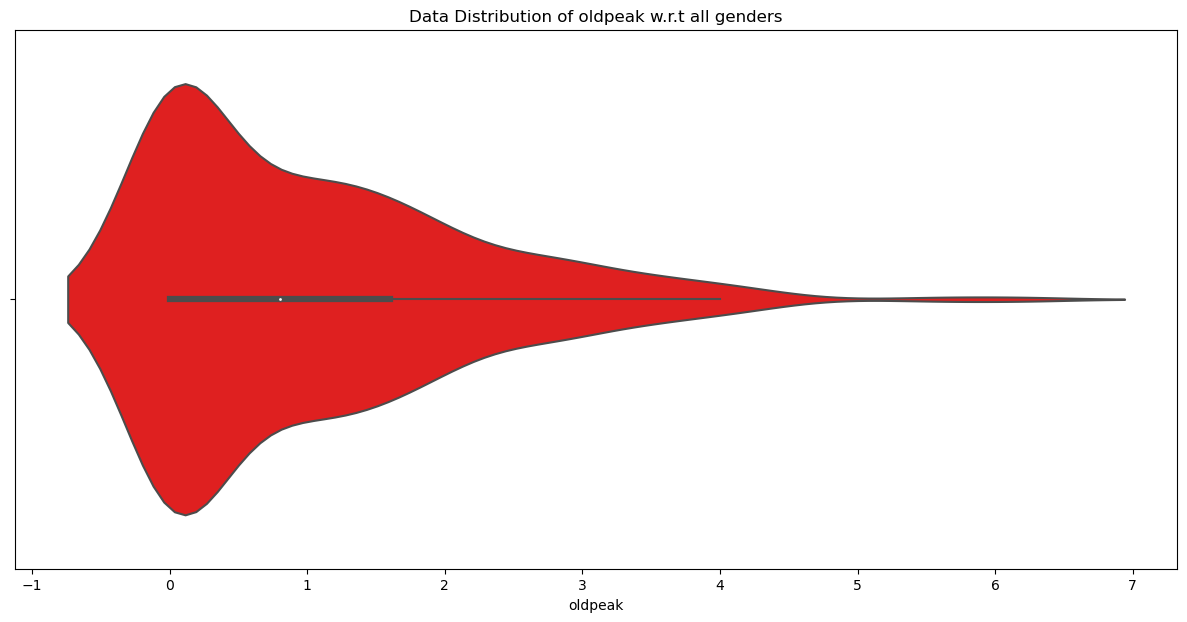

In [40]:
for i , col in enumerate(numeric_columns.columns):
    plt.subplots(figsize = (15, 7))
    plt.title(f"Data Distribution of {col} w.r.t all genders")
    sns.violinplot(data = numeric_columns, x = col, color = 'red')
    plt.show()  

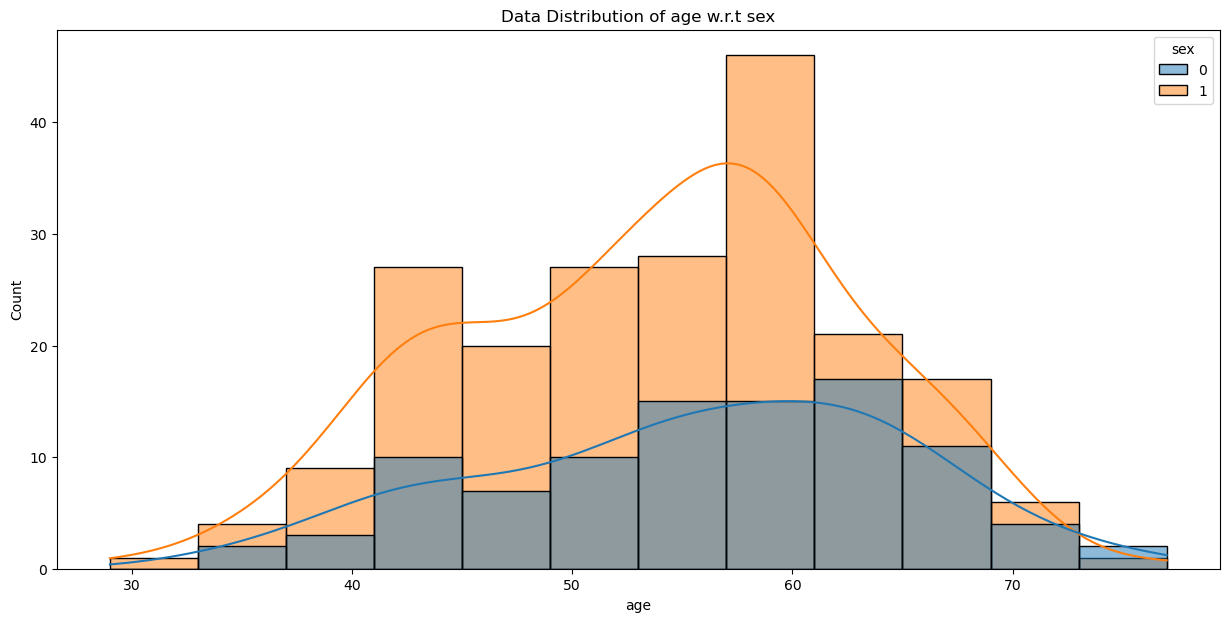

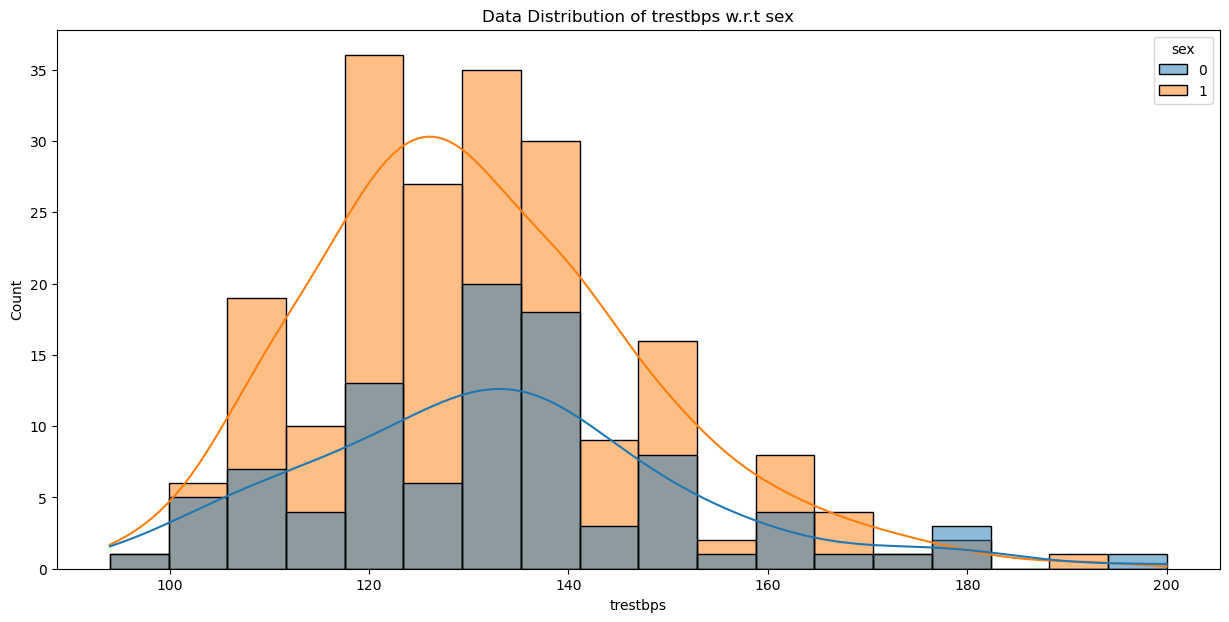

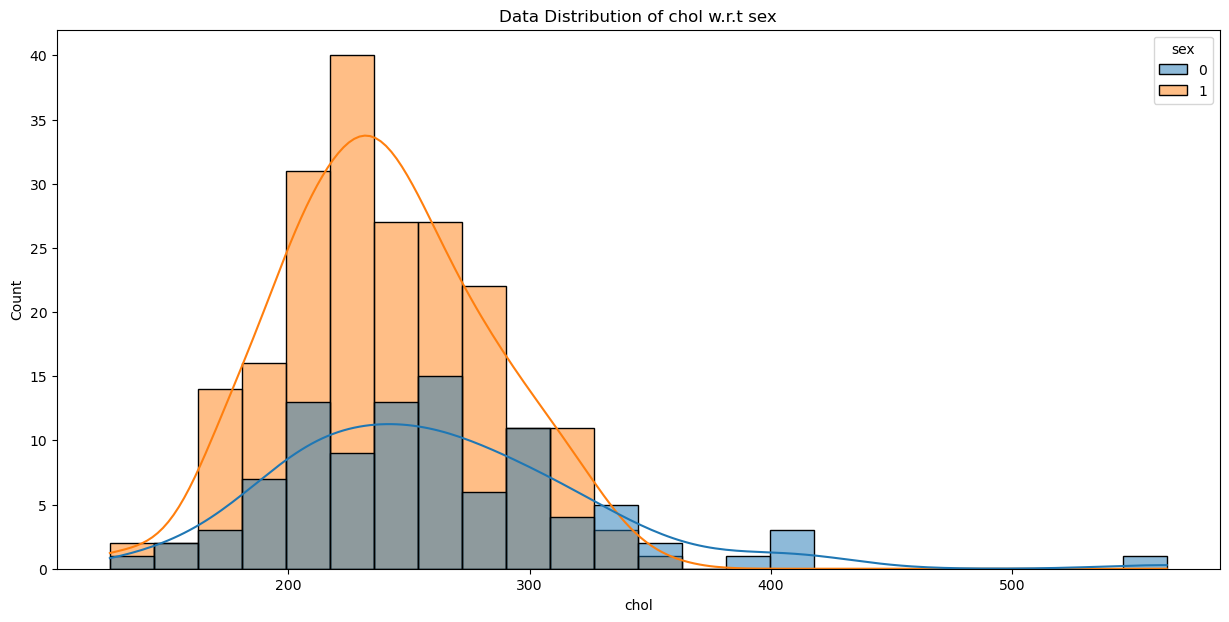

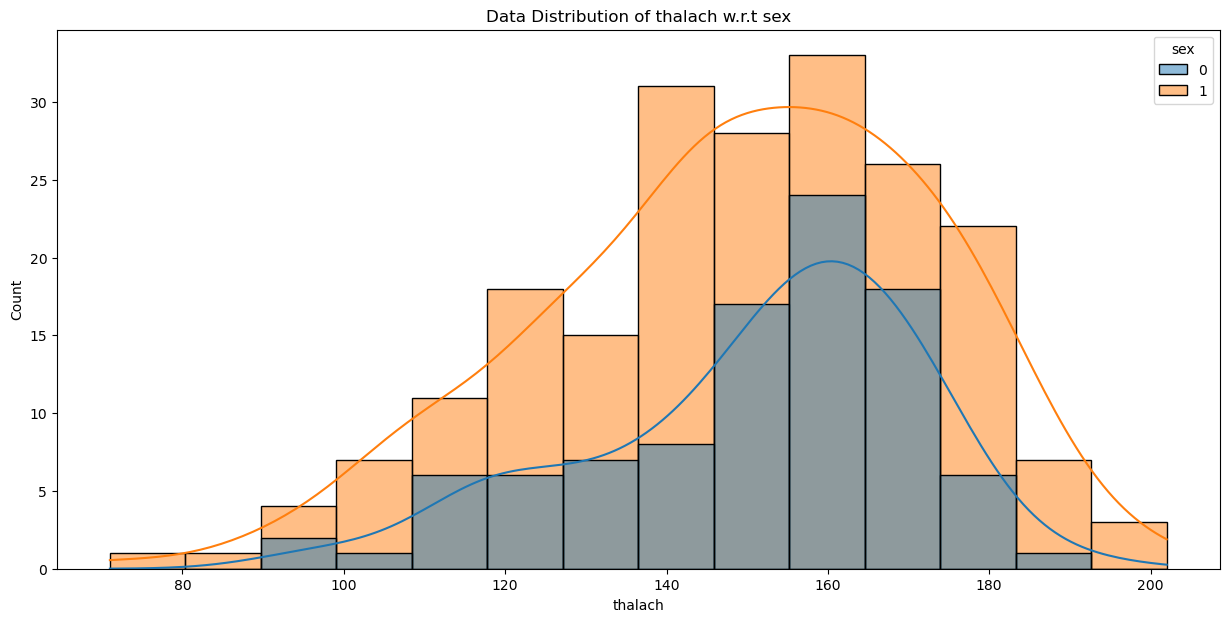

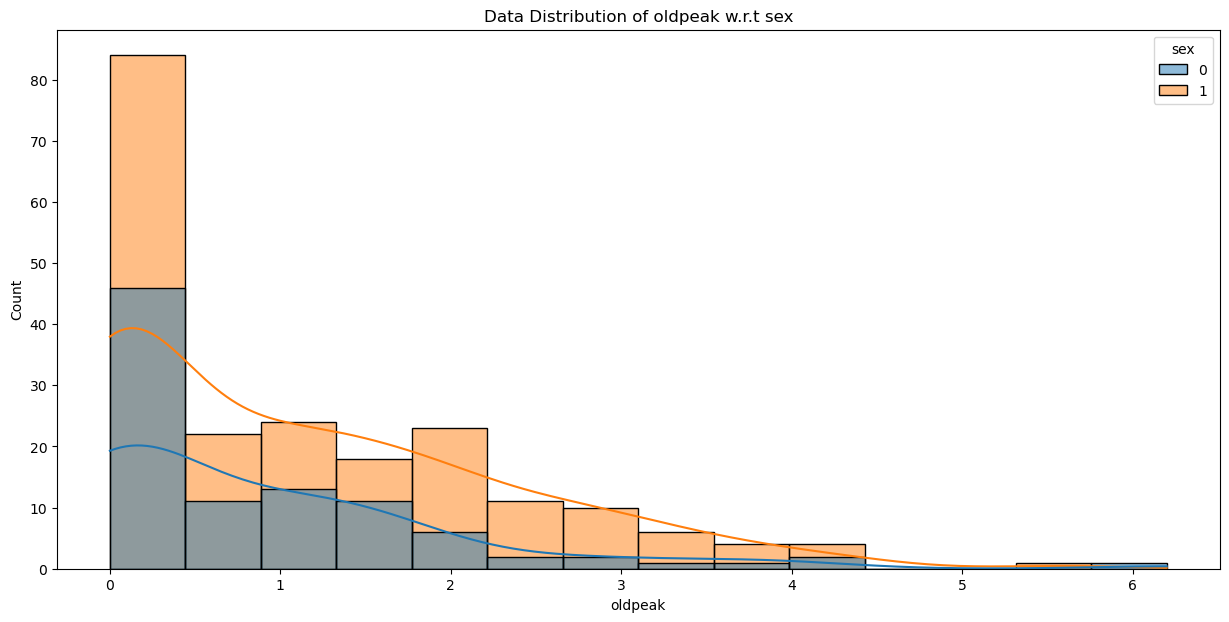

In [47]:
for i , col in enumerate(numeric_columns.columns):
    plt.subplots(figsize = (15, 7))
    plt.title(f"Data Distribution of {col} w.r.t sex")
    sns.histplot(data = numeric_columns, x = col, kde = True, hue = categoric_columns.sex)
    plt.show()

In [48]:
categoric_columns = copy_data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]


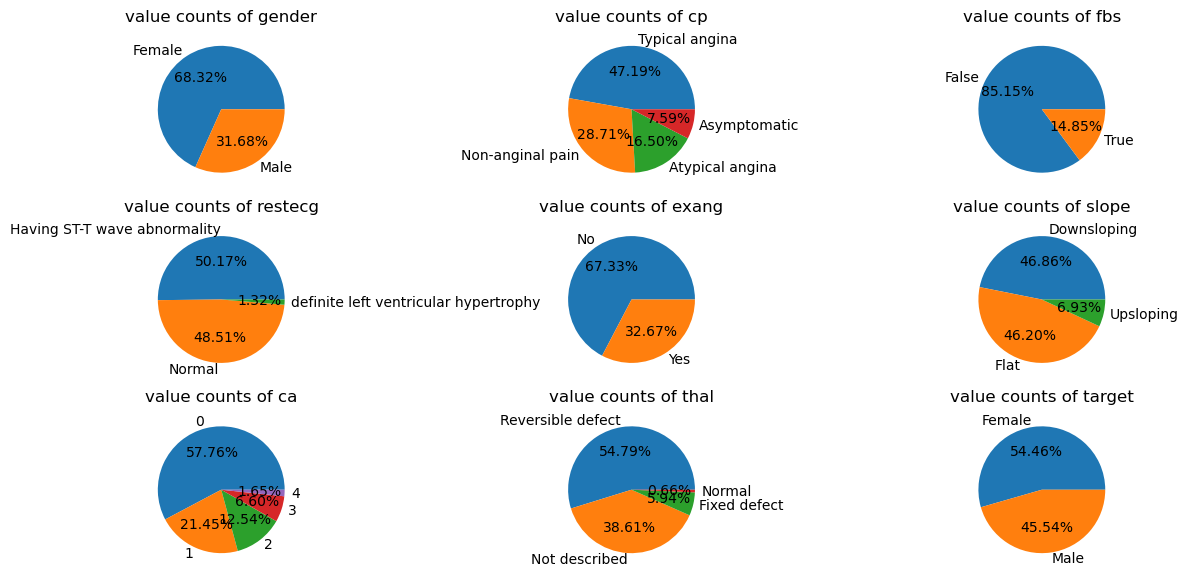

In [49]:
plt.subplots(3, 3, figsize = (15,7))
plt.subplot(331)
plt.title('value counts of gender')
plt.pie(x = categoric_columns['sex'].value_counts(), labels = ['Female', 'Male'], autopct = '%.2f%%')

plt.subplot(332)
plt.title('value counts of cp')
plt.pie(x = categoric_columns['cp'].value_counts(), labels = ['Typical angina', 'Non-anginal pain', 'Atypical angina', 'Asymptomatic'], autopct = '%.2f%%')

plt.subplot(333)
plt.title('value counts of fbs')
plt.pie(x = categoric_columns['fbs'].value_counts(), labels = ['False', 'True'], autopct = '%.2f%%')

plt.subplot(334)
plt.title('value counts of restecg')
plt.pie(x = categoric_columns['restecg'].value_counts(), labels = ['Having ST-T wave abnormality', 'Normal', 'definite left ventricular hypertrophy'], autopct ='%.2f%%')

plt.subplot(335)
plt.title('value counts of exang')
plt.pie(x = categoric_columns['exang'].value_counts(), labels = ['No', 'Yes'], autopct = '%.2f%%')

plt.subplot(336)
plt.title('value counts of slope')
plt.pie(x = categoric_columns['slope'].value_counts(), labels = ['Downsloping', 'Flat', 'Upsloping'], autopct = '%.2f%%')

plt.subplot(337)
plt.title('value counts of ca')
plt.pie(x = categoric_columns['ca'].value_counts(), labels = ['0', '1', '2', '3', '4'], autopct = '%.2f%%')

plt.subplot(338)
plt.title('value counts of thal')
plt.pie(x = categoric_columns['thal'].value_counts(), labels =['Reversible defect', 'Not described', 'Fixed defect', 'Normal'], autopct = '%.2f%%')

plt.subplot(339)
plt.title('value counts of target')
plt.pie(x = categoric_columns['target'].value_counts(), labels = ['Female', 'Male'], autopct = '%.2f%%')

plt.show()

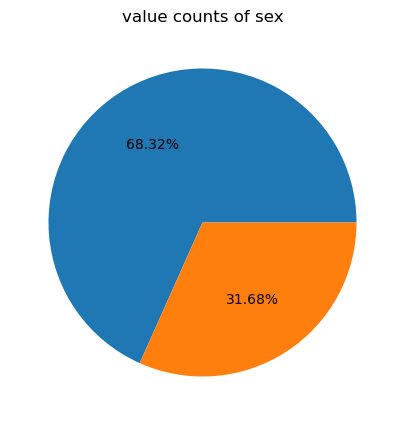

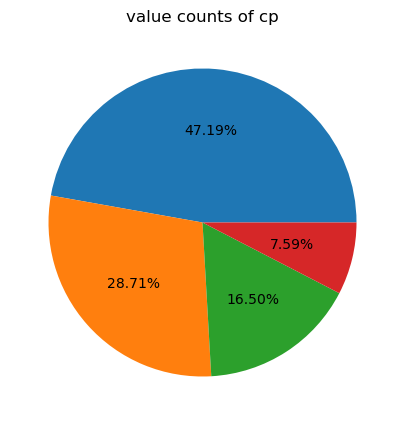

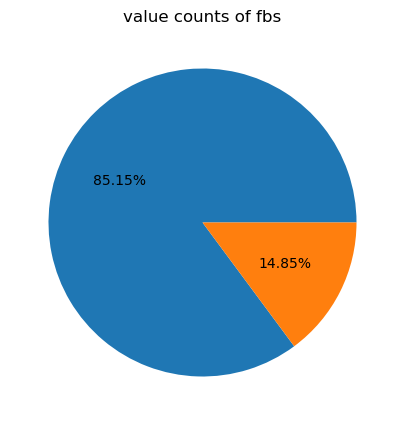

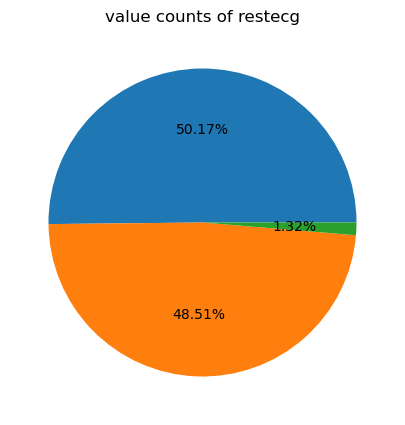

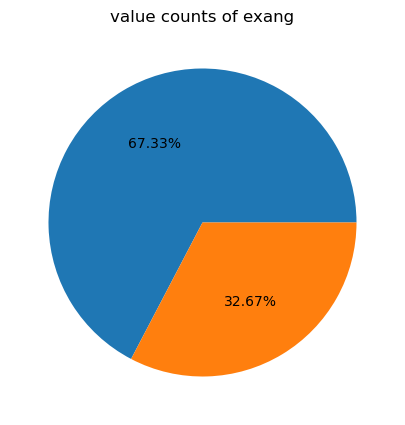

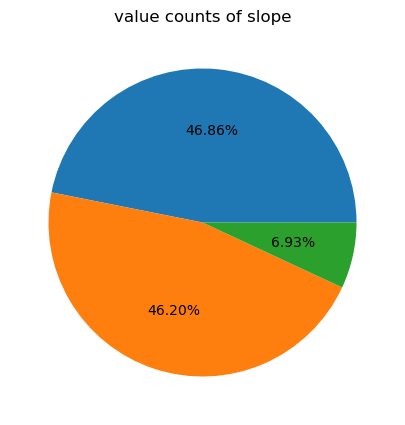

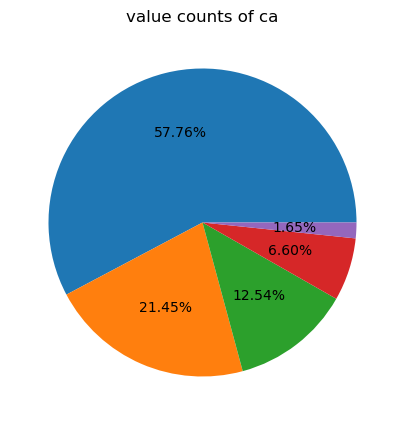

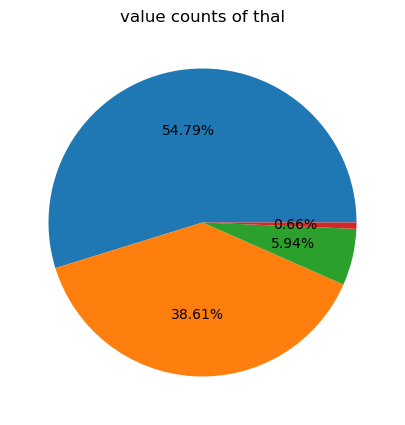

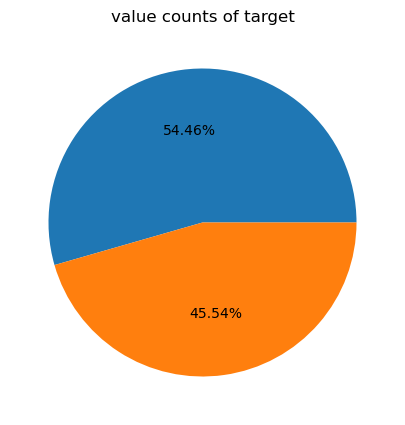

In [50]:
for i, col in enumerate(categoric_columns.columns):
    plt.subplots(figsize = (10, 5))
    plt.title(f"value counts of {col}")
    plt.pie(x = categoric_columns[col].value_counts(), autopct = '%.2f%%')
    plt.show()

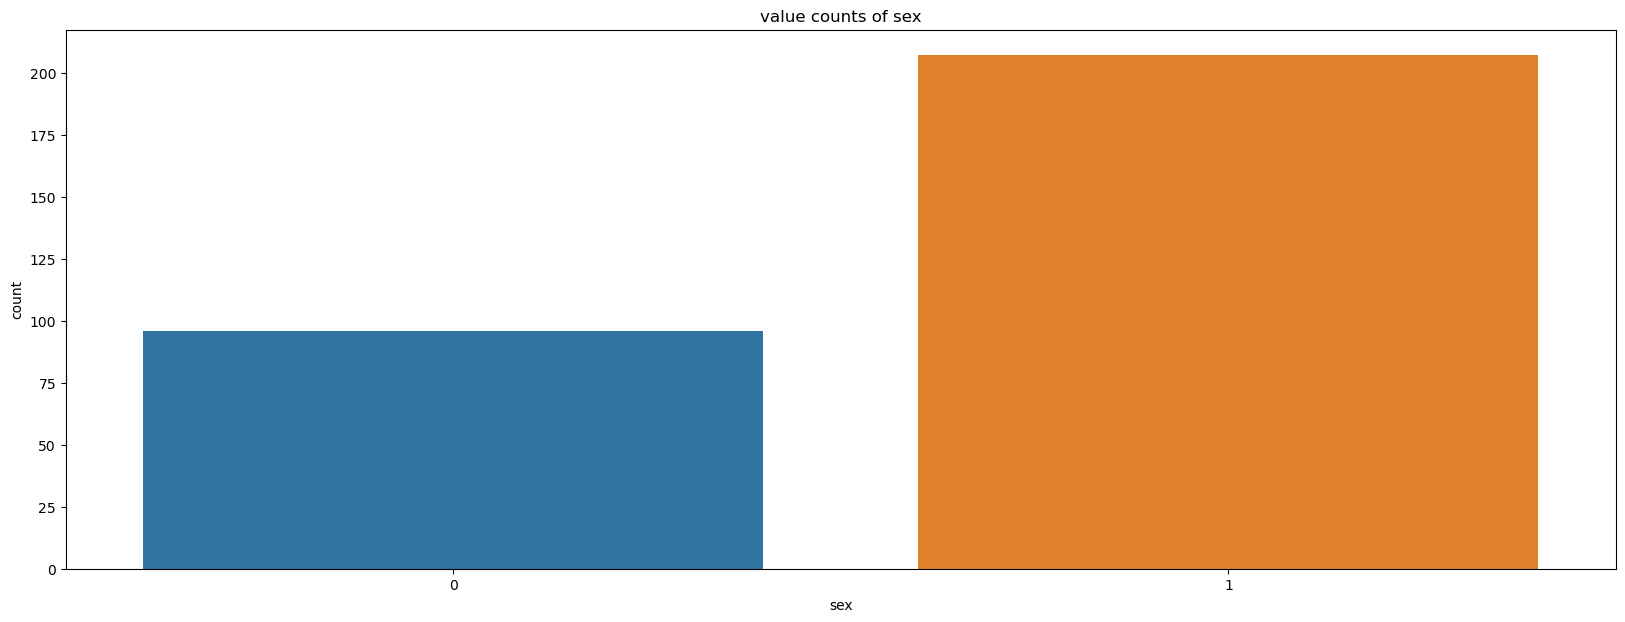

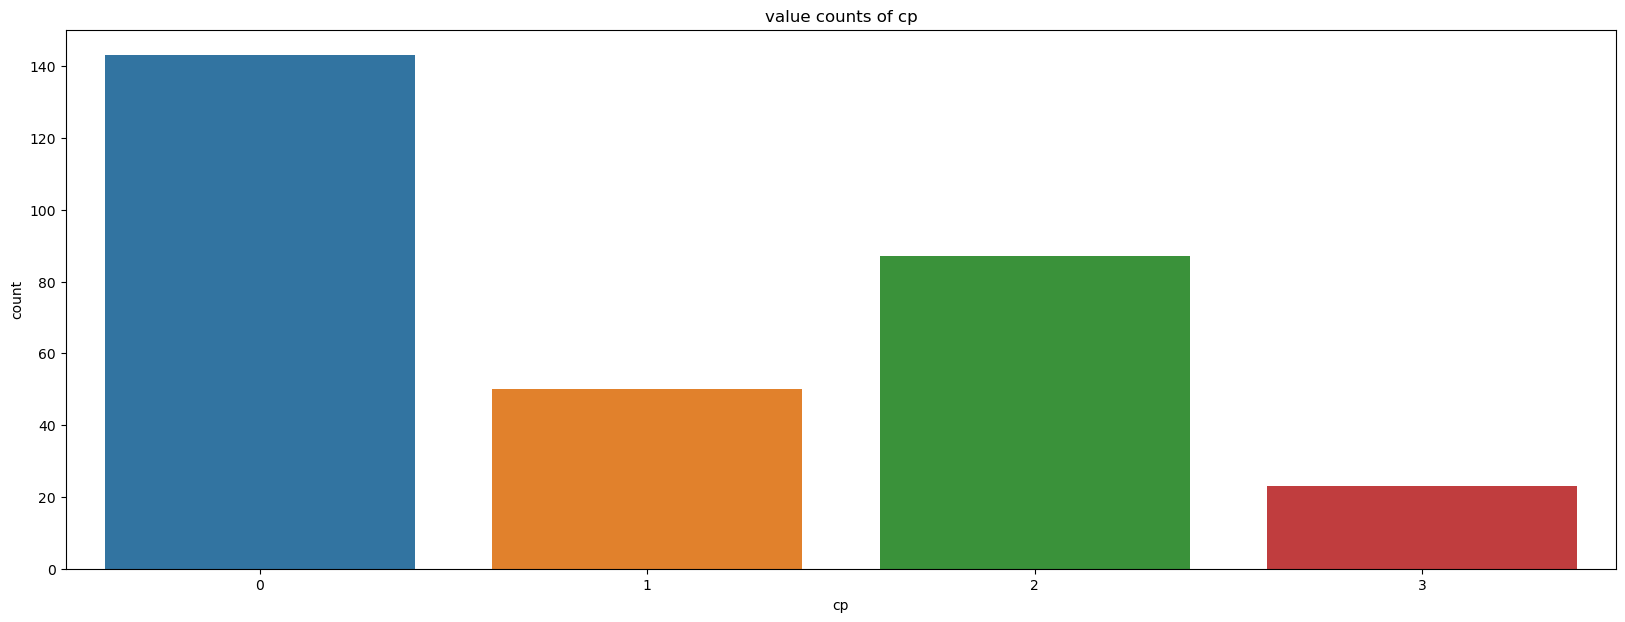

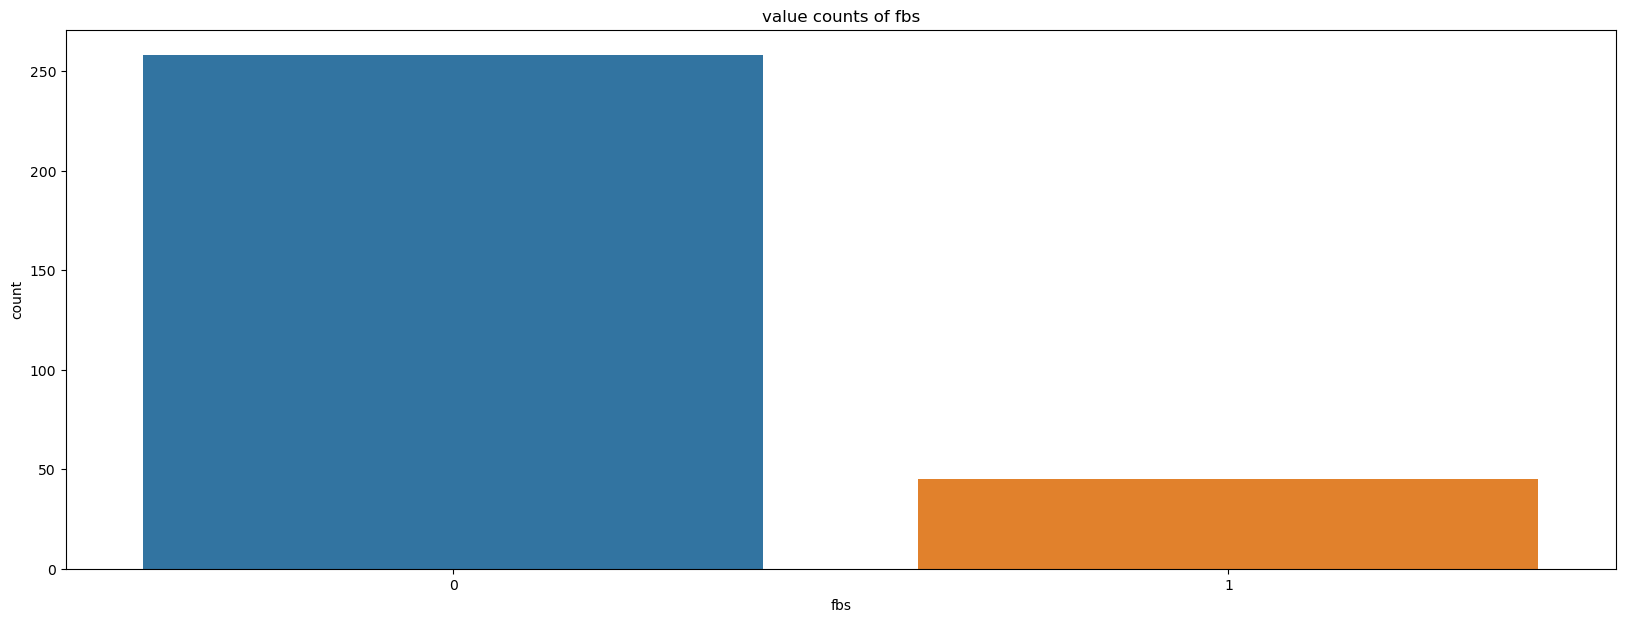

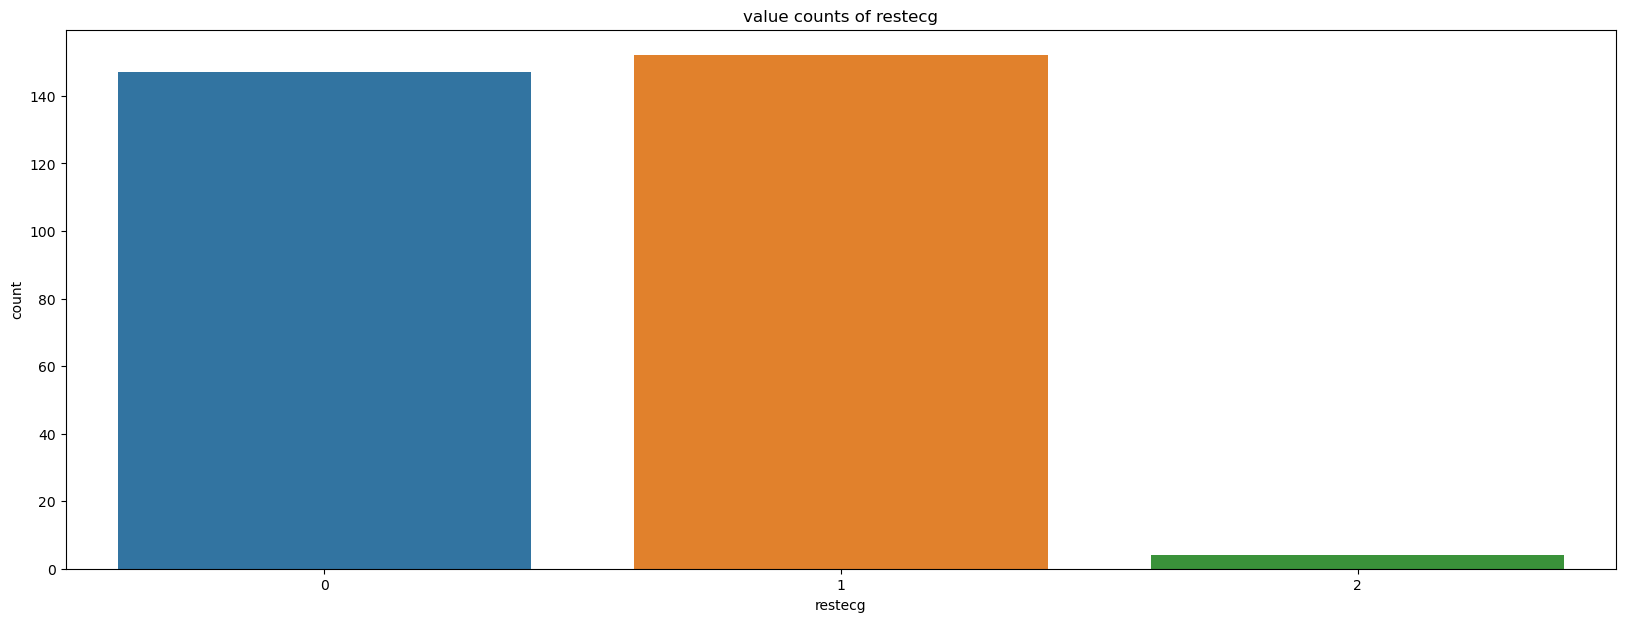

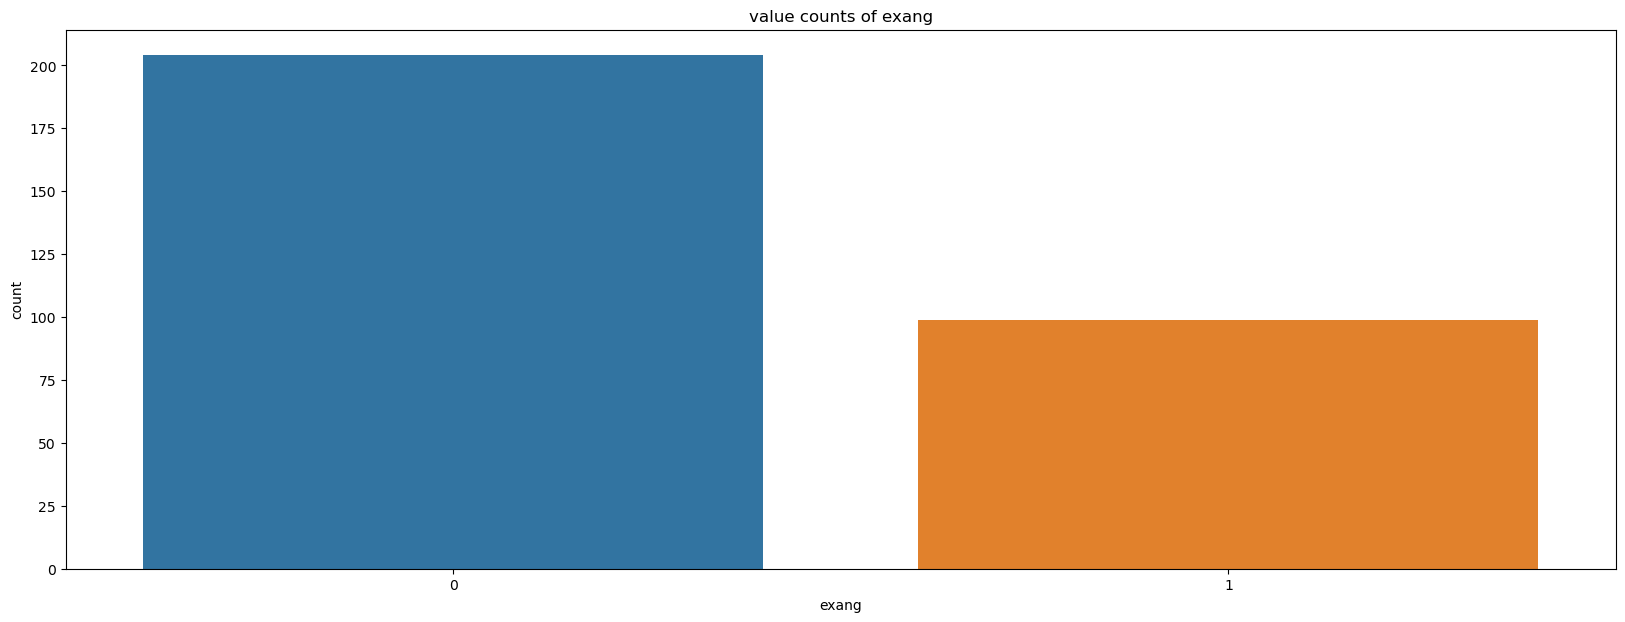

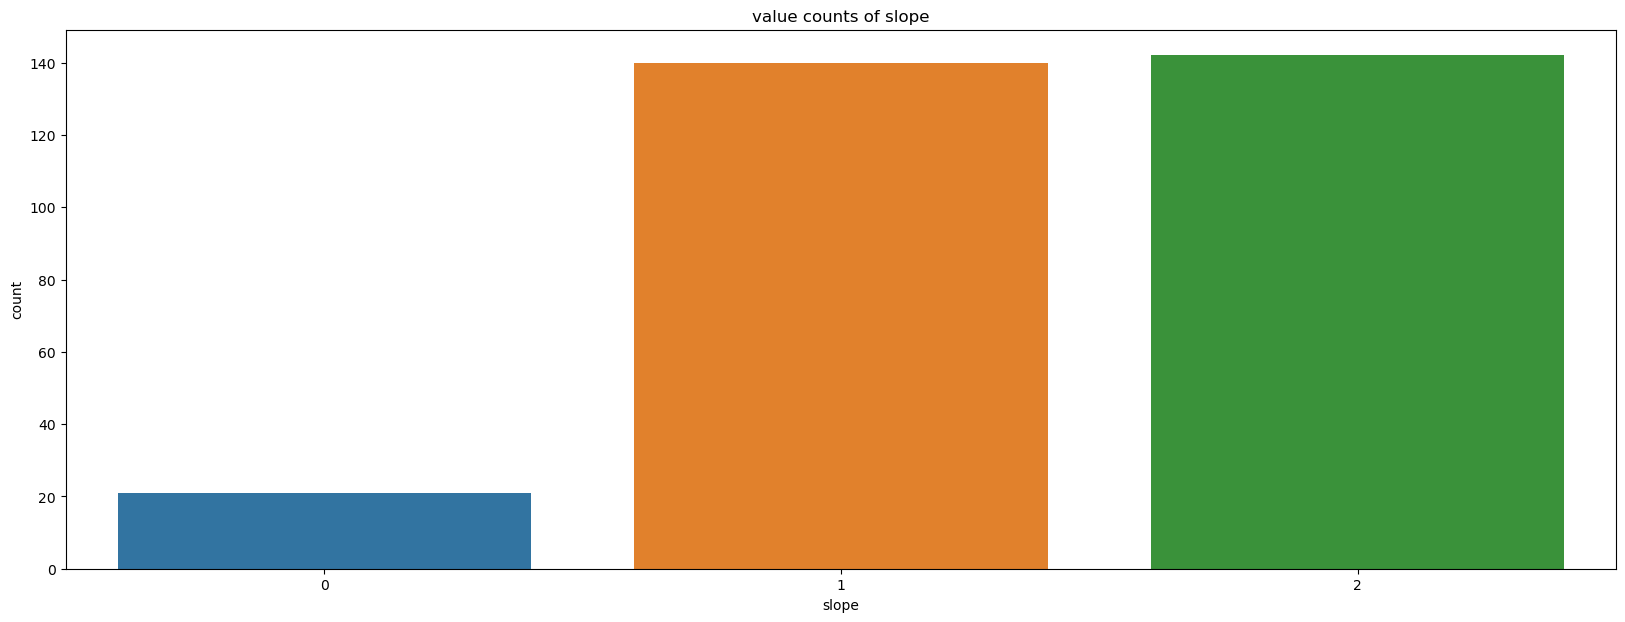

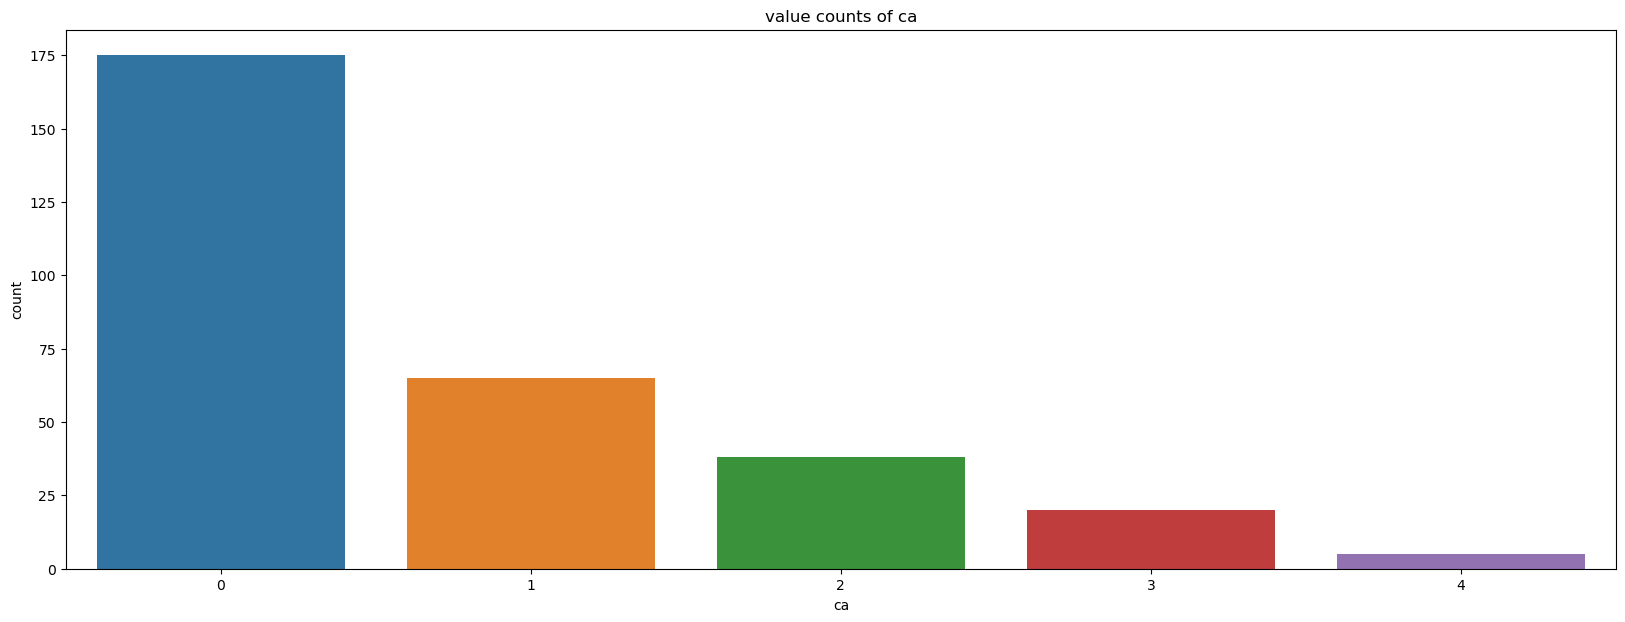

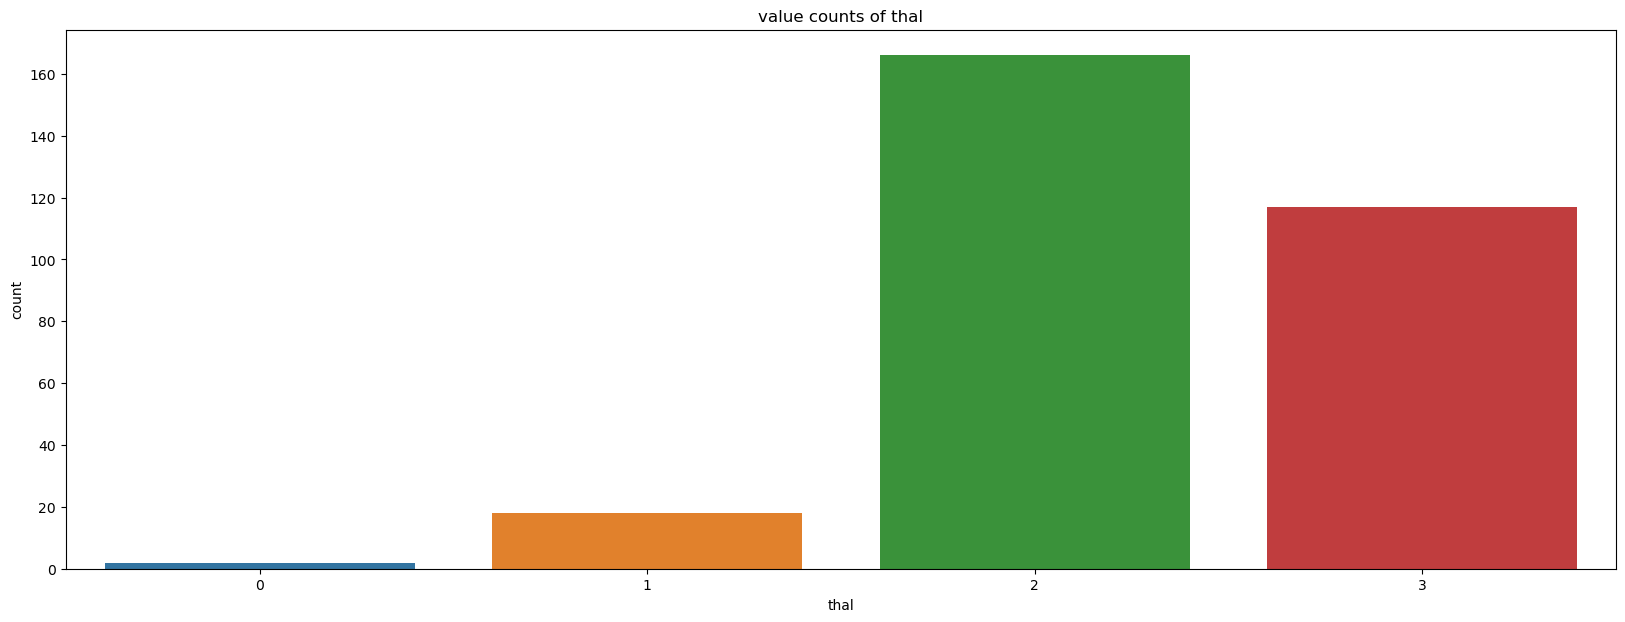

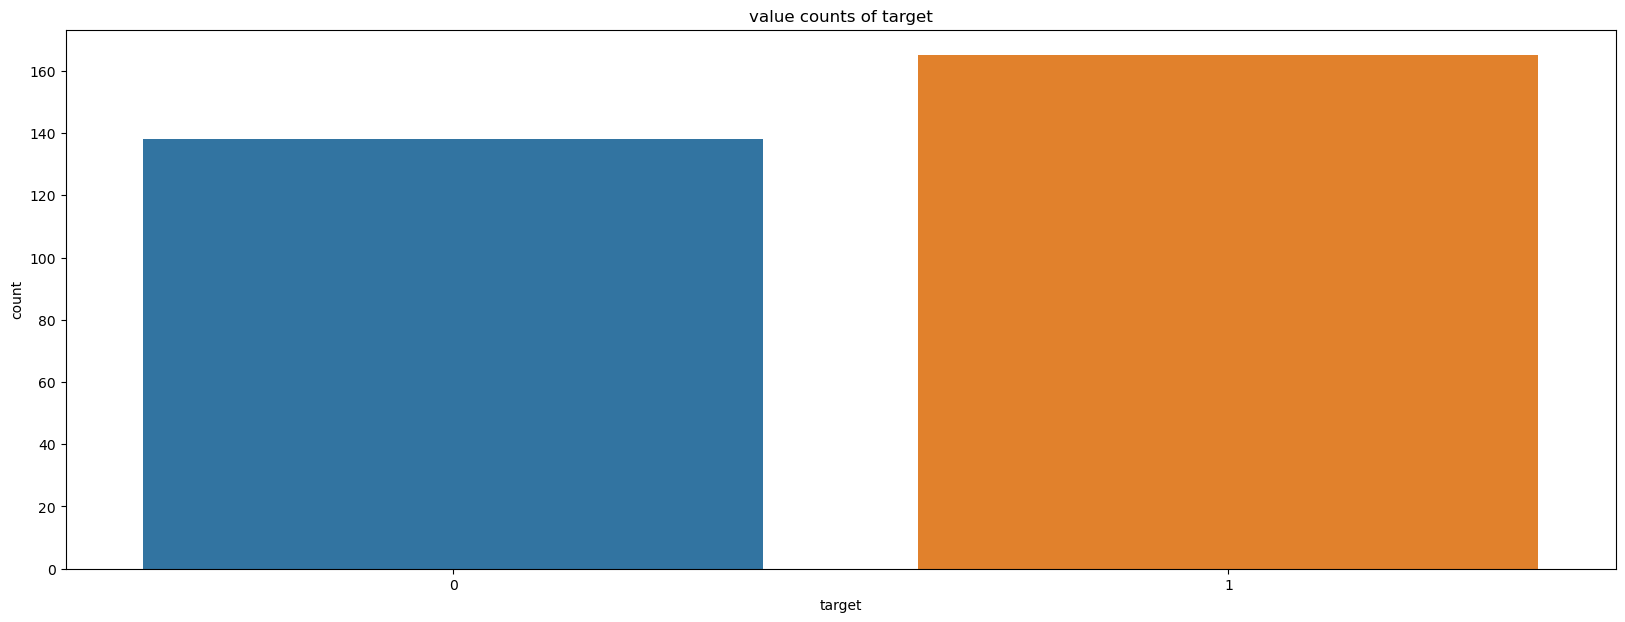

In [53]:
for i, col in enumerate(categoric_columns.columns):
    plt.subplots(figsize = (20,7))
    plt.title(f"value counts of {col}")
    sns.countplot(x =col , data = categoric_columns)
    plt.show()

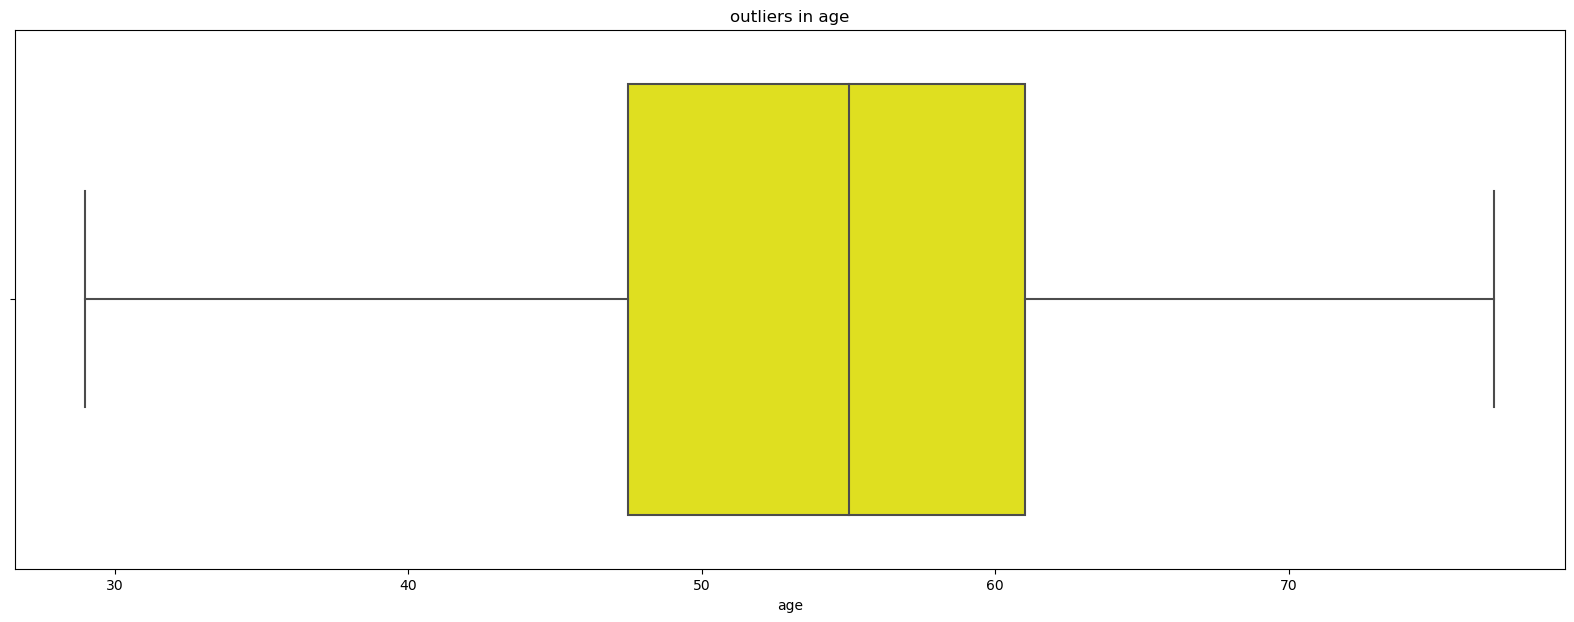

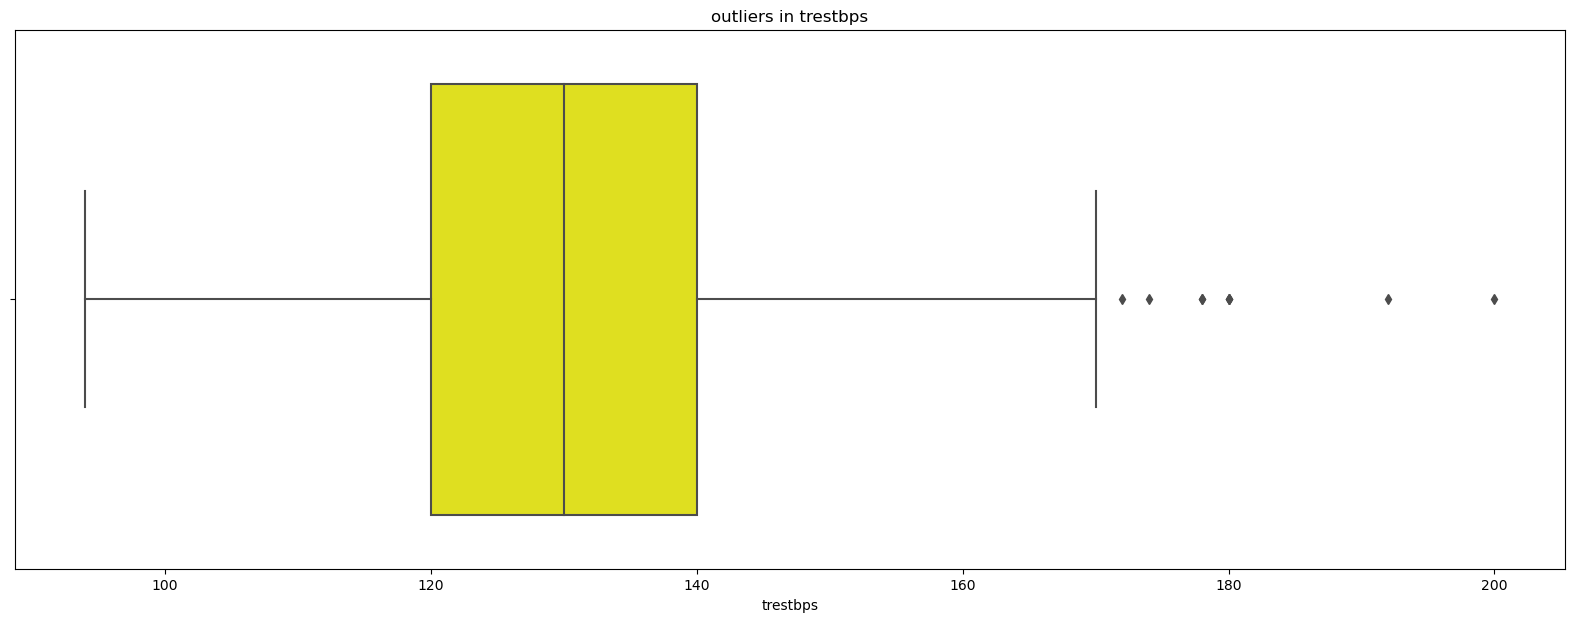

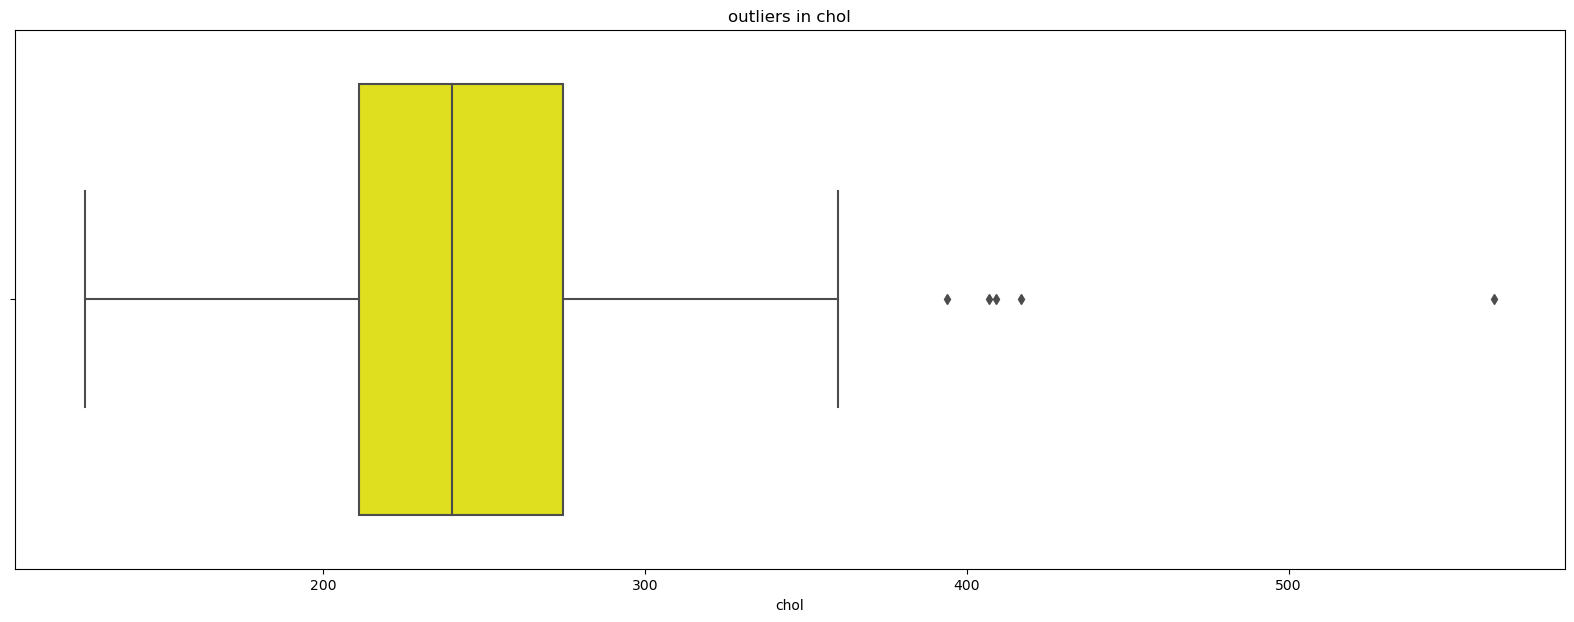

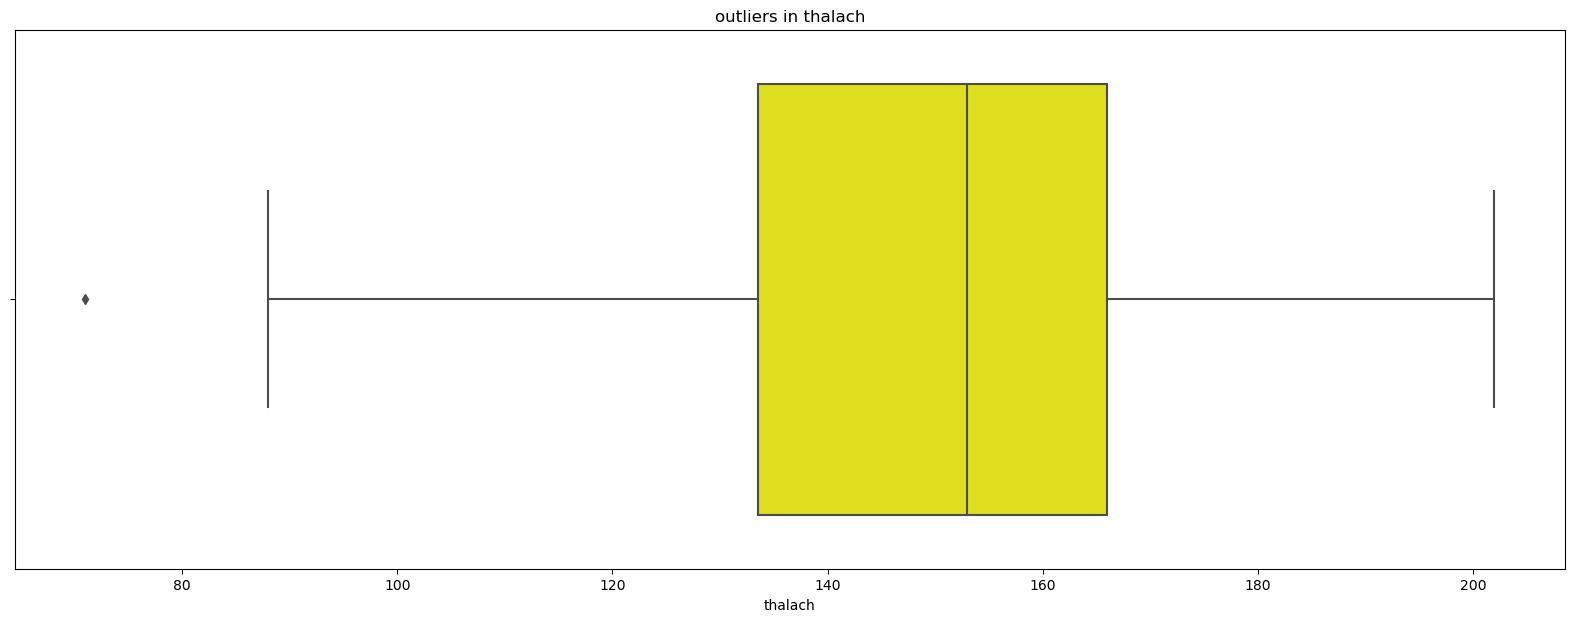

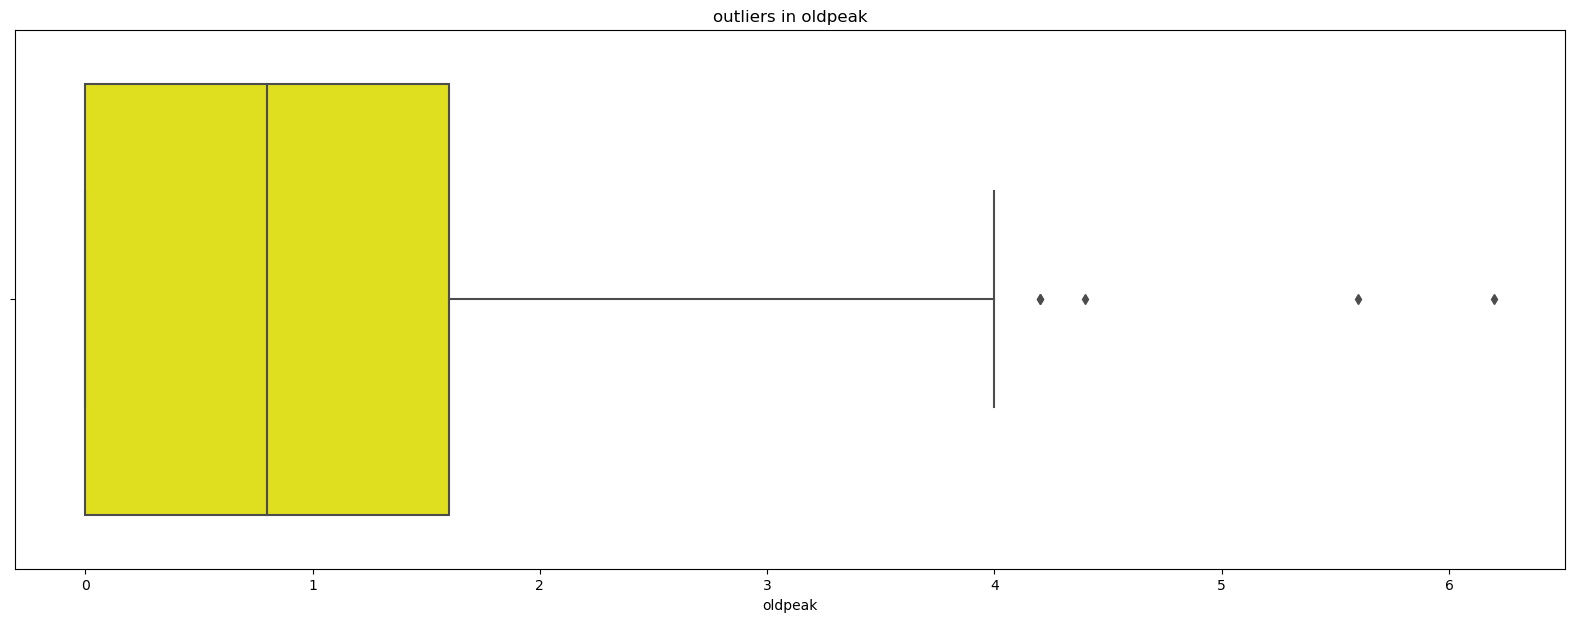

In [52]:
for i, col in enumerate(numeric_columns.columns):
    plt.subplots(figsize = (20,7))
    plt.title(f"outliers in {col}")
    sns.boxplot(x =col , data = numeric_columns, color = 'yellow')
    plt.show()

### BIVARIATE ANALYSIS ###

In [61]:
copy_data.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.125,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125,0.75
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


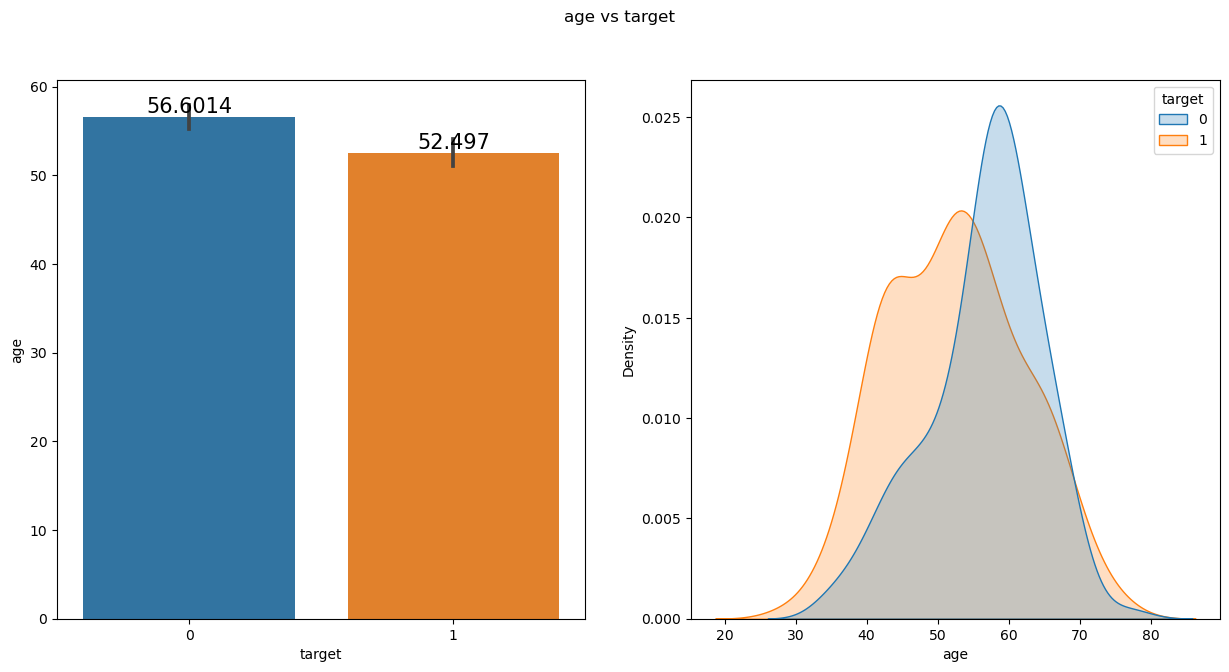

In [94]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
plt.suptitle('age vs target')
sns.barplot(data = copy_data, x = 'target', y = 'age')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 15)
    
plt.subplot(122)
sns.kdeplot(data = copy_data, x = 'age', hue = 'target', fill = True)
plt.show()

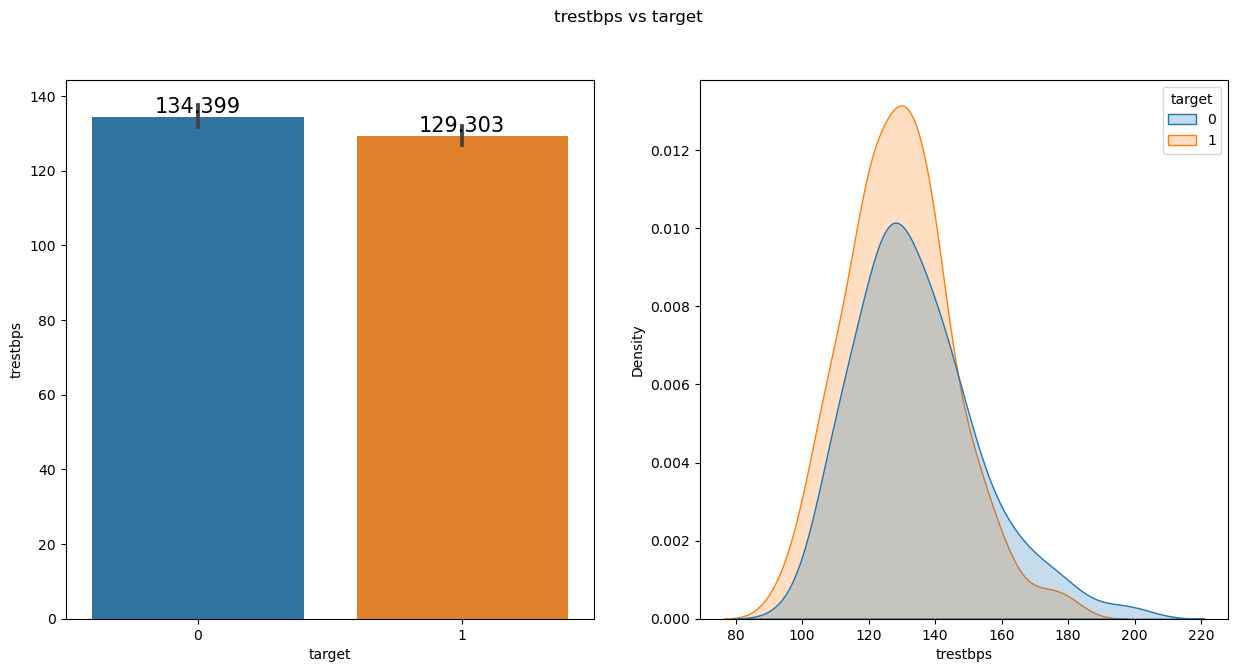

In [93]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
plt.suptitle('trestbps vs target')
sns.barplot(data = copy_data, x = 'target', y ='trestbps')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 15)
    
plt.subplot(122)
sns.kdeplot(data = copy_data, x = 'trestbps', hue = 'target', fill = True)
plt.show()

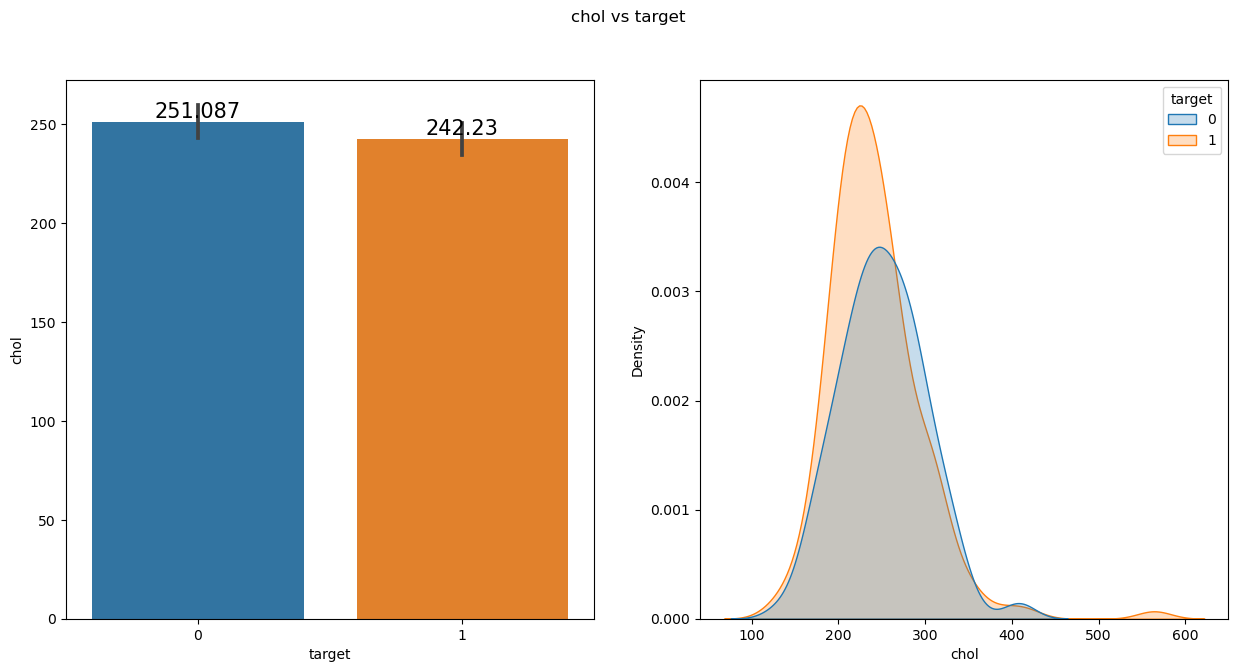

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
plt.suptitle('chol vs target')
sns.barplot(data = copy_data, x = 'target', y = 'chol')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 15)

plt.subplot(122)
sns.kdeplot(data = copy_data, x = 'chol', hue = 'target', fill = True)

plt.show()

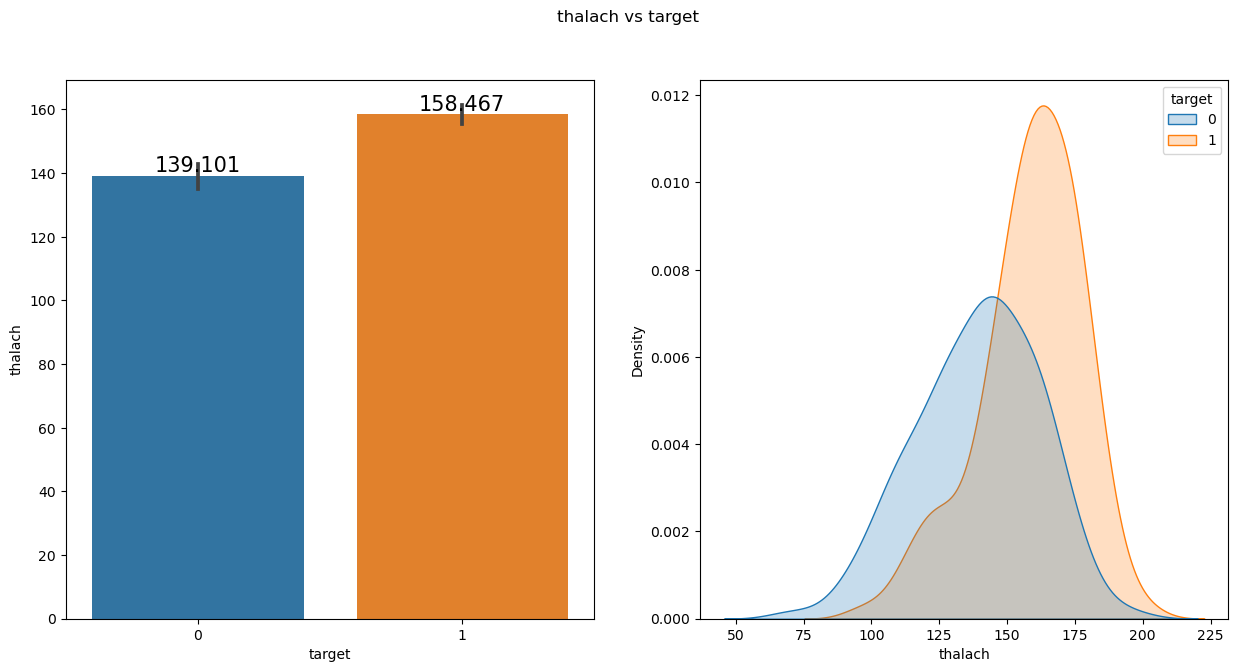

In [91]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
plt.suptitle('thalach vs target')
sns.barplot(data = copy_data, x = 'target', y = 'thalach')
for container in ax[0].containers:
    ax[0].bar_label(container, color= 'black', fontsize = 15)

plt.subplot(122)
sns.kdeplot(data = copy_data, x = 'thalach', hue = 'target', fill = True)
plt.show()

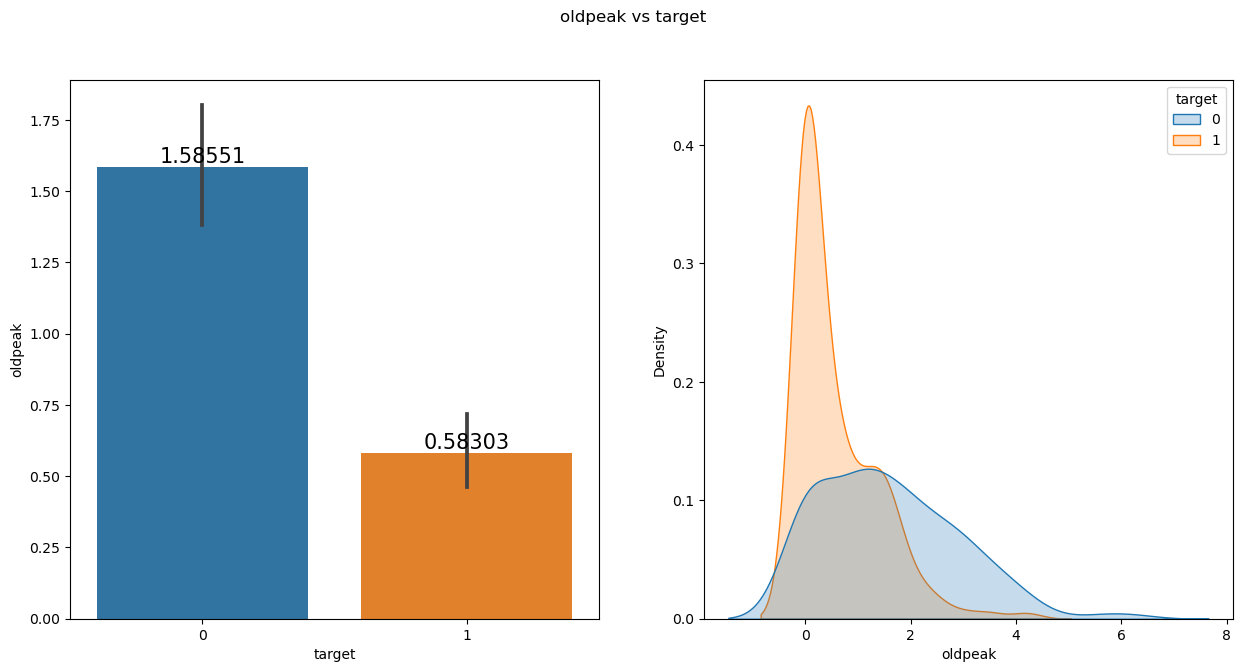

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
plt.suptitle('oldpeak vs target')
sns.barplot(data = copy_data, x = 'target', y = 'oldpeak')
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', fontsize = 15)

plt.subplot(122)
sns.kdeplot(data = copy_data, x = 'oldpeak', hue = 'target', fill = True)
plt.show()

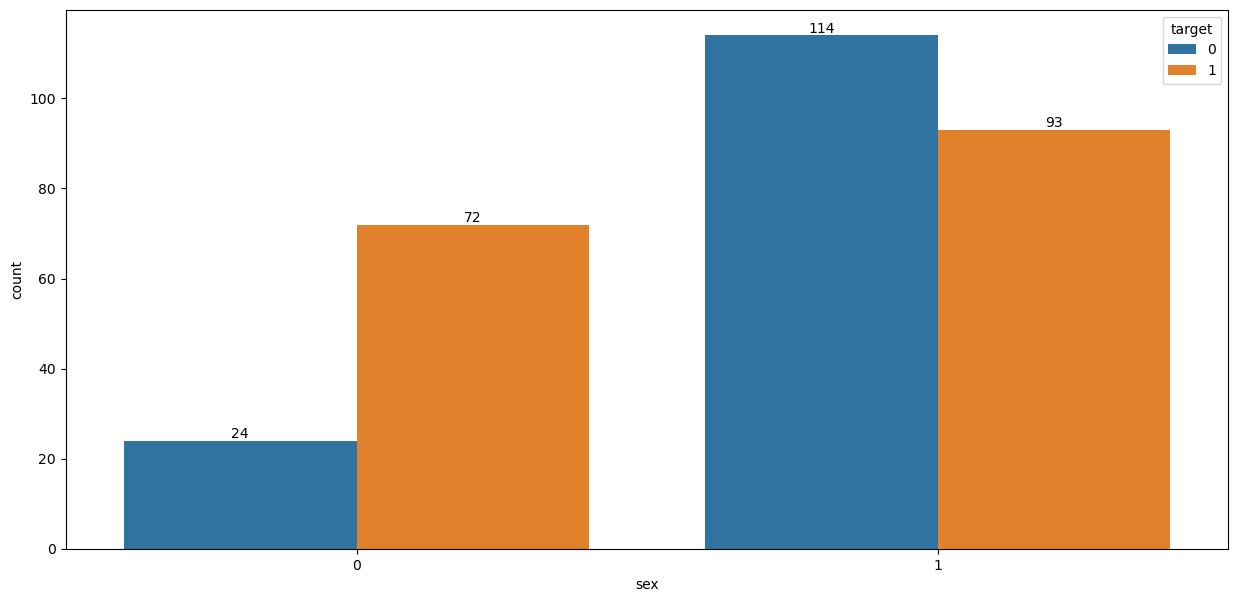

In [124]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'sex', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

## Their are total of 96 males in which 72 are having heart disease
## And in females 114 are having heart disease

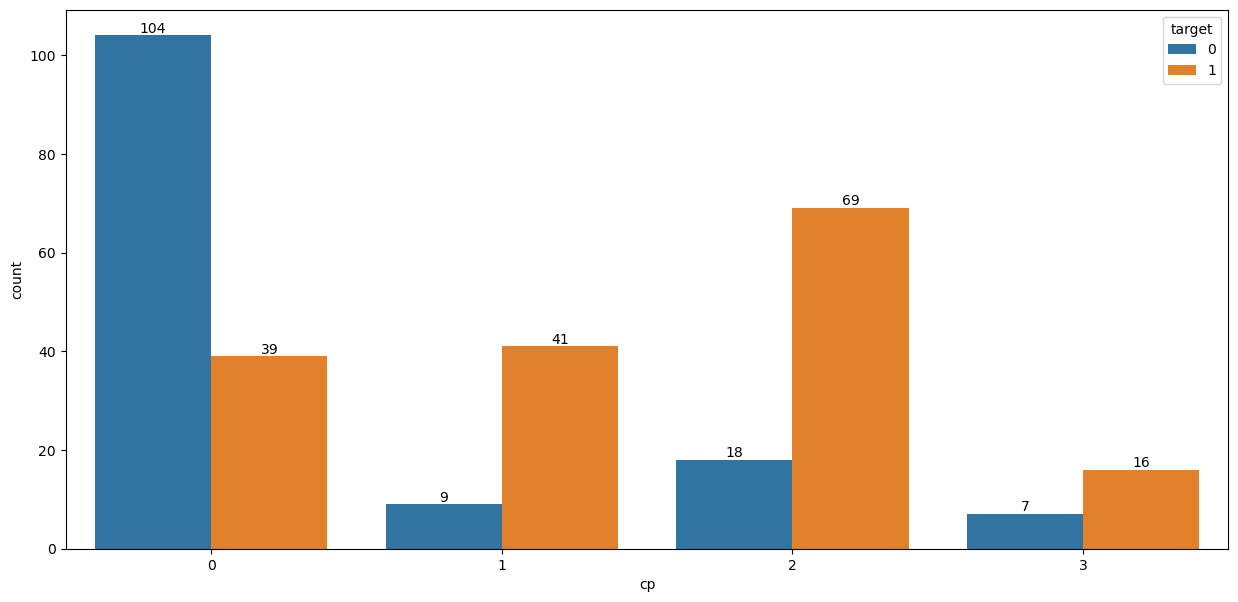

In [137]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'cp', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

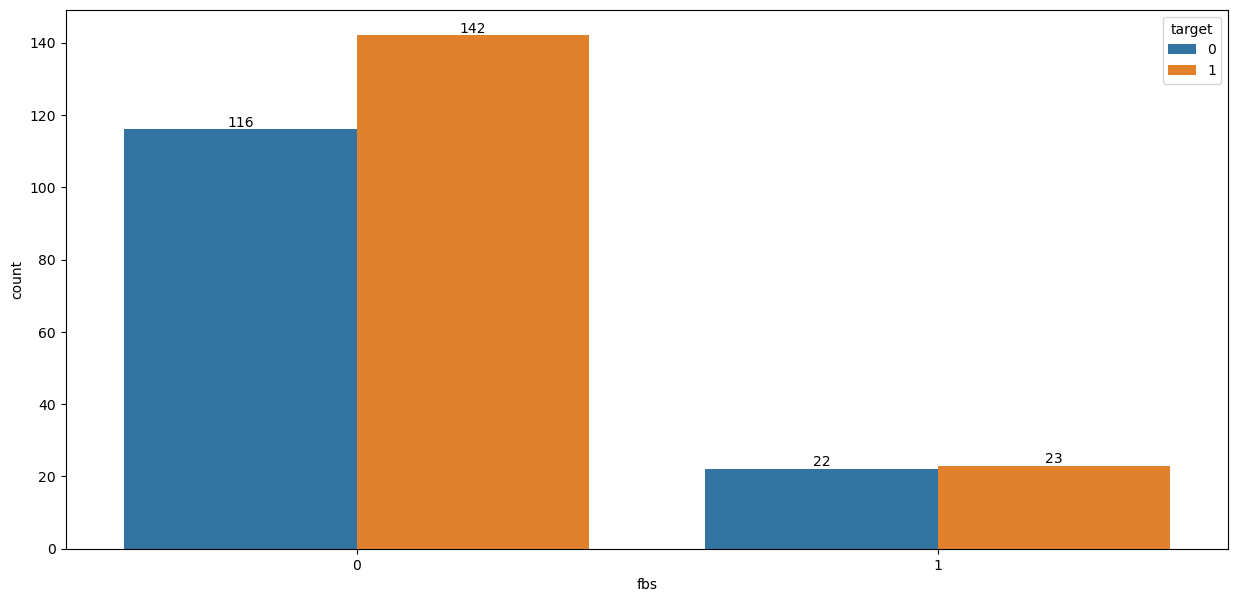

In [123]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'fbs', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

## From the above graph their are 116 males who do not have heart disease and 142 who have heart disease
## When it comes to female their are 22 females who do not have heart disease and 23 who have heart disease

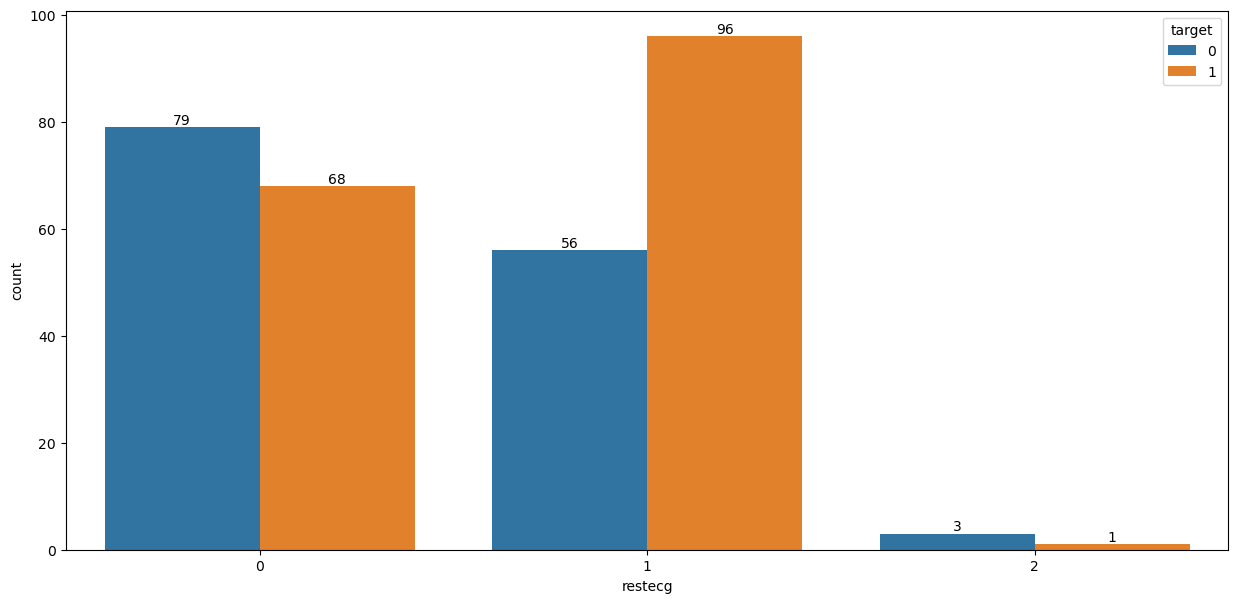

In [139]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'restecg', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

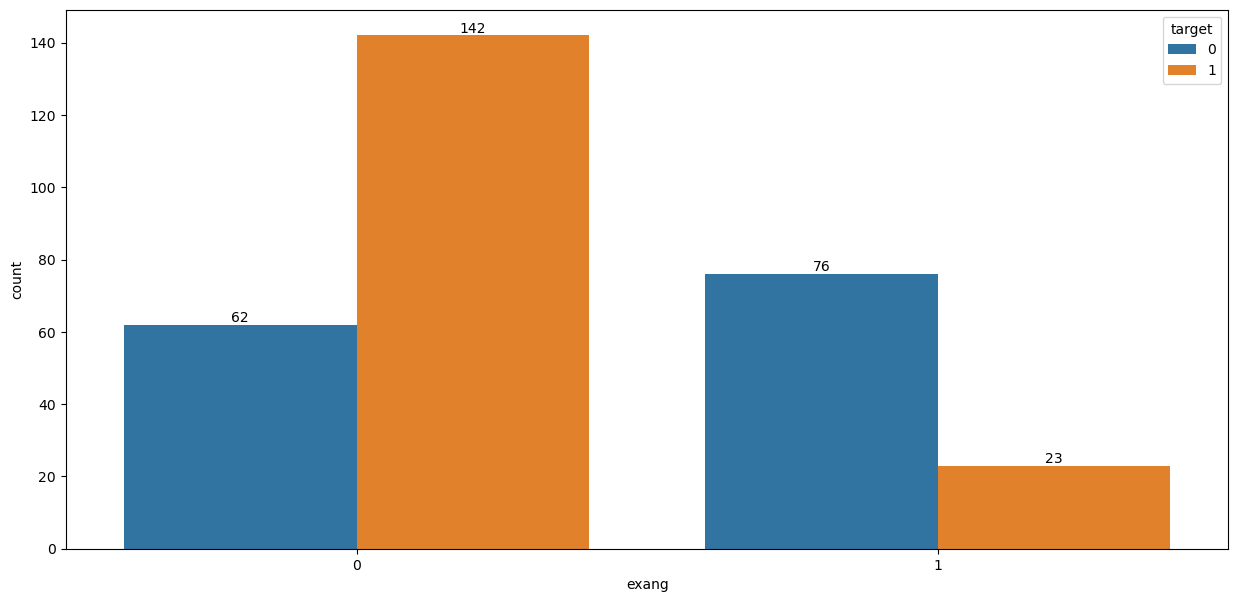

In [140]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'exang', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

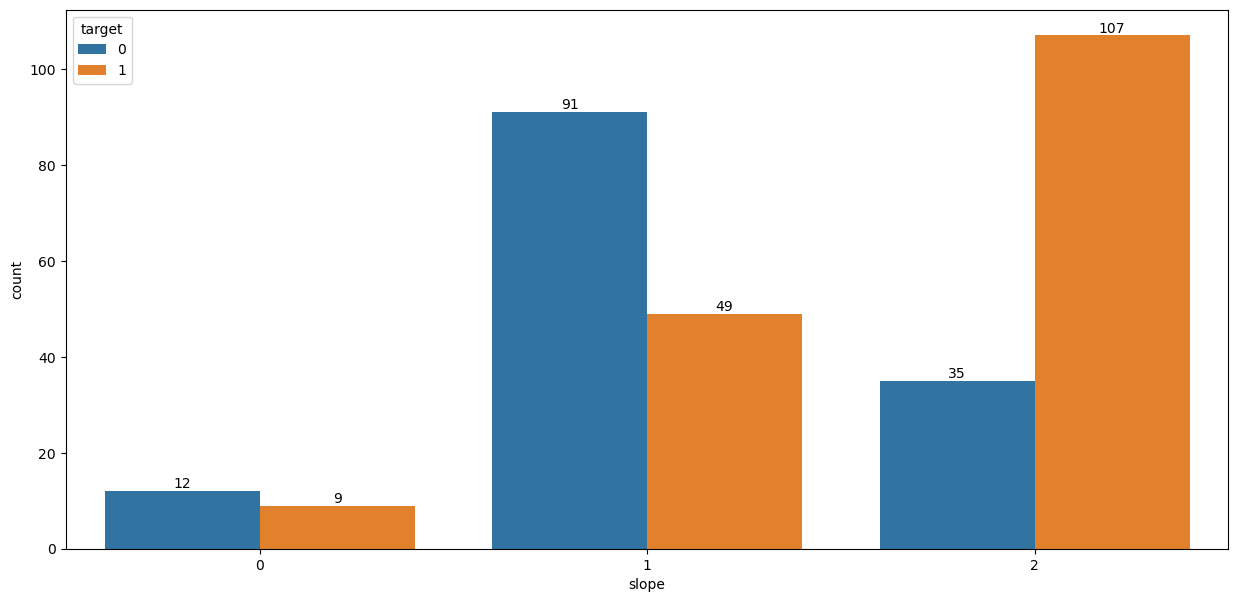

In [141]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'slope', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

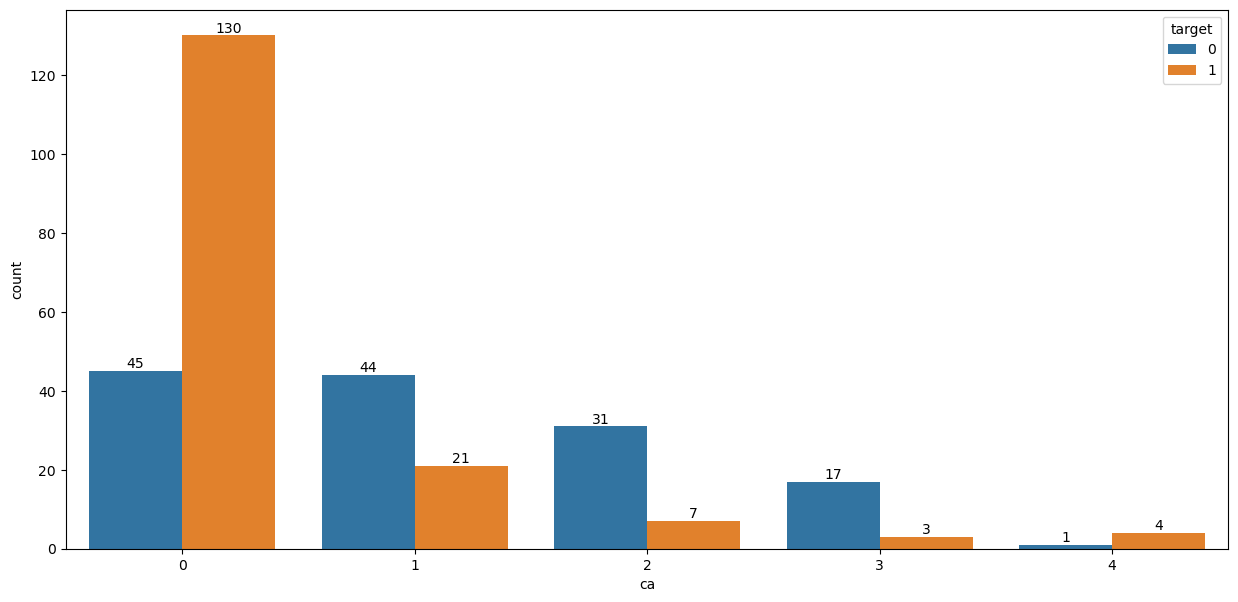

In [142]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'ca', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()

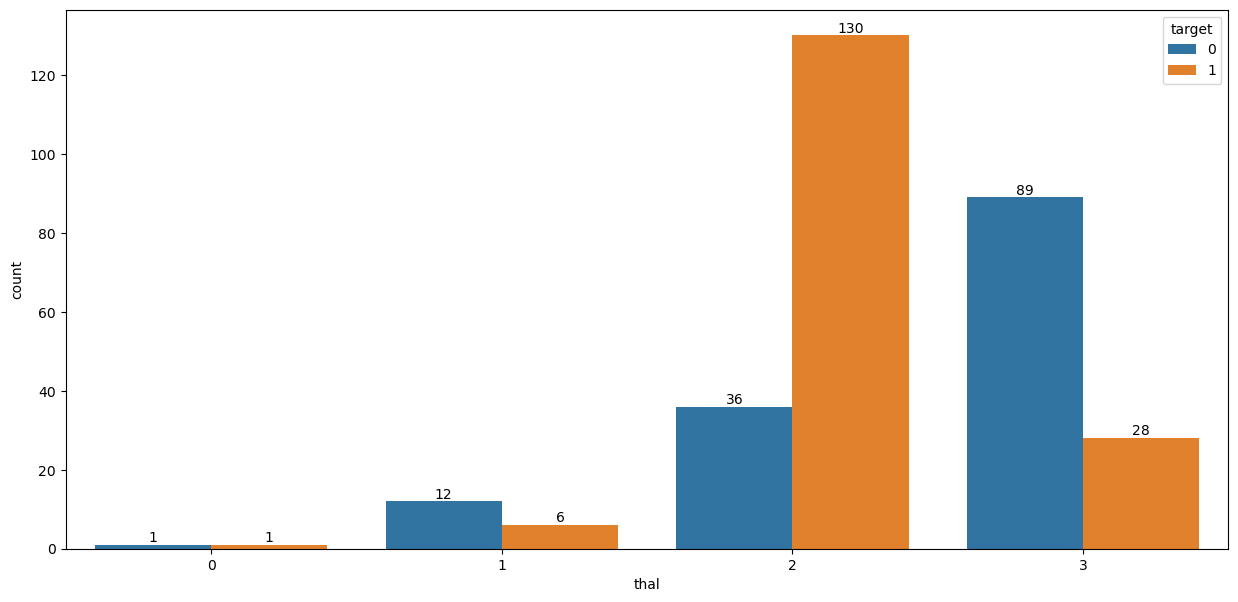

In [143]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plt.subplot(111)
sns.countplot(data = copy_data, x = 'thal', hue = 'target')
for label in ax.containers:
    ax.bar_label(label)
    
plt.show()